In [194]:
import pandas as pd
import gc

# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

import matplotlib.ticker as ticker

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 학습 모델 저장을 위한 라이브러리
import pickle

### 데이터 확인

In [173]:
df1 = pd.read_parquet(r'data/train/4.청구입금정보/201807_train_.parquet')
df2 = pd.read_parquet(r'data/train/4.청구입금정보/201808_train_.parquet')
df3 = pd.read_parquet(r'data/train/4.청구입금정보/201809_train_.parquet')
df4 = pd.read_parquet(r'data/train/4.청구입금정보/201810_train_.parquet')
df5 = pd.read_parquet(r'data/train/4.청구입금정보/201811_train_.parquet')
df6 = pd.read_parquet(r'data/train/4.청구입금정보/201812_train_.parquet')
df7 = pd.read_parquet(r'data/test/4.청구입금정보/201807_test_.parquet')
df8 = pd.read_parquet(r'data/test/4.청구입금정보/201808_test_.parquet')
df9 = pd.read_parquet(r'data/test/4.청구입금정보/201809_test_.parquet')
df10 = pd.read_parquet(r'data/test/4.청구입금정보/201810_test_.parquet')
df11 = pd.read_parquet(r'data/test/4.청구입금정보/201811_test_.parquet')
df12 = pd.read_parquet(r'data/test/4.청구입금정보/201812_test_.parquet')

In [174]:
all_df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])
all_df.reset_index(inplace=True, drop=True)
all_df

,기준년월,ID,대표결제일,대표결제방법코드,대표청구지고객주소구분코드,대표청구서수령지구분코드,청구서수령방법,청구서발송여부_B0,청구서발송여부_R3M,청구서발송여부_R6M,...,할인금액_청구서_B0M,상환개월수_결제일_R6M,상환개월수_결제일_R3M,선결제건수_R6M,선결제건수_R3M,연체건수_R6M,연체건수_R3M,혜택수혜금액_R3M,포인트_마일리지_환산_B0M,혜택수혜금액
0,201807,TRAIN_000000,27,자동이체,미확인,당사페이앱+이메일,문자메세지,1,1,1,...,0,5,3,0,0,1,0,3,0,0
1,201807,TRAIN_000001,13,자동이체,주거지,우편,우편,1,1,1,...,163,6,3,0,0,0,0,0,0,0
2,201807,TRAIN_000002,1,자동이체,미확인,이메일,이메일,1,1,1,...,0,6,3,0,0,0,0,121,0,50
3,201807,TRAIN_000003,5,자동이체,주거지,우편,우편,1,1,1,...,0,5,3,2,0,0,0,3,0,2
4,201807,TRAIN_000004,13,자동이체,주거지,우편,우편,0,1,1,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,201812,TEST_99995,20,자동이체,회사,우편,우편,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2999996,201812,TEST_99996,20,자동이체,주거지,우편,우편,1,1,1,...,50,5,3,3,2,0,0,149,0,49
2999997,201812,TEST_99997,15,자동이체,미확인,이메일,이메일,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2999998,201812,TEST_99998,12,자동이체,미확인,K톡명세서+이메일,K톡,1,1,1,...,242,1,1,7,3,0,0,0,0,0


In [175]:
print(all_df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 46 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   기준년월              int64 
 1   ID                object
 2   대표결제일             int64 
 3   대표결제방법코드          object
 4   대표청구지고객주소구분코드     object
 5   대표청구서수령지구분코드      object
 6   청구서수령방법           object
 7   청구서발송여부_B0        int64 
 8   청구서발송여부_R3M       int64 
 9   청구서발송여부_R6M       int64 
 10  청구금액_B0           int64 
 11  청구금액_R3M          int64 
 12  청구금액_R6M          int64 
 13  포인트_마일리지_건별_B0M   int64 
 14  포인트_마일리지_건별_R3M   int64 
 15  포인트_포인트_건별_B0M    int64 
 16  포인트_포인트_건별_R3M    int64 
 17  포인트_마일리지_월적립_B0M  int64 
 18  포인트_마일리지_월적립_R3M  int64 
 19  포인트_포인트_월적립_B0M   int64 
 20  포인트_포인트_월적립_R3M   int64 
 21  포인트_적립포인트_R12M    int64 
 22  포인트_적립포인트_R3M     int64 
 23  포인트_이용포인트_R12M    int64 
 24  포인트_이용포인트_R3M     int64 
 25  포인트_잔여포인트_B0M     int64 
 26  마일_적립포인트_R12M     int64 
 27  마일_적립포인트_R3M

In [37]:
all_df.isna().sum()

기준년월                0
ID                  0
대표결제일               0
대표결제방법코드            0
대표청구지고객주소구분코드       0
대표청구서수령지구분코드        0
청구서수령방법             0
청구서발송여부_B0          0
청구서발송여부_R3M         0
청구서발송여부_R6M         0
청구금액_B0             0
청구금액_R3M            0
청구금액_R6M            0
포인트_마일리지_건별_B0M     0
포인트_마일리지_건별_R3M     0
포인트_포인트_건별_B0M      0
포인트_포인트_건별_R3M      0
포인트_마일리지_월적립_B0M    0
포인트_마일리지_월적립_R3M    0
포인트_포인트_월적립_B0M     0
포인트_포인트_월적립_R3M     0
포인트_적립포인트_R12M      0
포인트_적립포인트_R3M       0
포인트_이용포인트_R12M      0
포인트_이용포인트_R3M       0
포인트_잔여포인트_B0M       0
마일_적립포인트_R12M       0
마일_적립포인트_R3M        0
마일_이용포인트_R12M       0
마일_이용포인트_R3M        0
마일_잔여포인트_B0M        0
할인건수_R3M            0
할인금액_R3M            0
할인건수_B0M            0
할인금액_B0M            0
할인금액_청구서_R3M        0
할인금액_청구서_B0M        0
상환개월수_결제일_R6M       0
상환개월수_결제일_R3M       0
선결제건수_R6M           0
선결제건수_R3M           0
연체건수_R6M            0
연체건수_R3M            0
혜택수혜금액_R3M          0
포인트_마일리지_환산_B0M     0
혜택수혜금액    

### 기준연월
- 데이터 기준년월

In [176]:
all_df['기준년월'].value_counts()

기준년월
201807    500000
201808    500000
201809    500000
201810    500000
201811    500000
201812    500000
Name: count, dtype: int64

### ID
- 고유 ID

In [177]:
all_df['ID'].value_counts()

ID
TEST_99960      6
TEST_99961      6
TEST_99962      6
TEST_99963      6
TEST_99964      6
               ..
TRAIN_000003    6
TRAIN_000004    6
TRAIN_000005    6
TRAIN_000006    6
TRAIN_000007    6
Name: count, Length: 500000, dtype: int64

### 대표결제일
- 카드 사용 금액 입금 일자

In [178]:
all_df['대표결제일'].value_counts()

대표결제일
25    677268
1     399471
27    345848
20    325362
15    313786
13    284590
23    272303
5     211542
12    168416
21      1401
10        13
Name: count, dtype: int64

In [179]:
df1['대표결제일'].value_counts()

대표결제일
25    90137
1     53273
27    46199
20    43436
15    40796
13    37847
23    36277
5     28246
12    23610
21      179
Name: count, dtype: int64

In [180]:
df2['대표결제일'].value_counts()

대표결제일
25    90081
1     53373
27    46181
20    43424
15    41159
13    37879
23    36316
5     28374
12    23038
21      175
Name: count, dtype: int64

In [12]:
df3['대표결제일'].value_counts()

대표결제일
25    90094
1     53400
27    46183
20    43337
15    41619
13    37831
23    36325
5     28315
12    22697
21      196
10        3
Name: count, dtype: int64

In [13]:
df4['대표결제일'].value_counts()

대표결제일
25    90152
1     53350
27    46156
20    43304
15    42008
13    37880
23    36384
5     28172
12    22387
21      205
10        2
Name: count, dtype: int64

In [14]:
df5['대표결제일'].value_counts()

대표결제일
25    90244
1     53317
27    46184
20    43309
15    42518
13    37887
23    36355
5     28051
12    21924
21      210
10        1
Name: count, dtype: int64

In [15]:
df6['대표결제일'].value_counts()

대표결제일
25    90327
1     53312
27    46123
20    43367
15    42910
13    37908
23    36456
5     27973
12    21442
21      179
10        3
Name: count, dtype: int64

### 대표결제방법코드
- 카드 사용 금액 결제 방법 코드

In [16]:
all_df['대표결제방법코드'].value_counts()

대표결제방법코드
자동이체    3000000
Name: count, dtype: int64

### 대표청구지고객주소구분코드
- 카드 사용 금액 청구 주소 구분 코드

In [17]:
all_df['대표청구지고객주소구분코드'].value_counts()

대표청구지고객주소구분코드
미확인    1404120
주거지    1280855
회사      315025
Name: count, dtype: int64

### 대표청구서수령지구분코드
- 카드 사용 금액 청구서 수령 방법 코드

In [19]:
all_df['대표청구서수령지구분코드'].value_counts()

대표청구서수령지구분코드
우편           1601743
이메일           994614
당사페이앱+이메일     304386
미수신            50922
K톡명세서+이메일      48284
당사멤버십+이메일         50
문자메세지              1
Name: count, dtype: int64

In [21]:
df1['대표청구서수령지구분코드'].value_counts()

대표청구서수령지구분코드
우편           213849
이메일          132186
당사페이앱+이메일     37826
K톡명세서+이메일      8838
미수신            7298
당사멤버십+이메일         2
문자메세지             1
Name: count, dtype: int64

In [22]:
df2['대표청구서수령지구분코드'].value_counts()

대표청구서수령지구분코드
우편           213533
이메일          132264
당사페이앱+이메일     39524
K톡명세서+이메일      7573
미수신            7101
당사멤버십+이메일         5
Name: count, dtype: int64

### 청구서수령방법
- 우편, 이메일 등 청구서수령방법

In [23]:
all_df['청구서수령방법'].value_counts()

청구서수령방법
우편       1601743
이메일       994614
문자메세지     304387
미수령        50922
K톡         48284
당사멤버십         50
Name: count, dtype: int64

### 청구서발송여부_B0
- 청구서 발송 여부 (당월)

In [24]:
all_df['청구서발송여부_B0'].value_counts()

청구서발송여부_B0
1    2313349
0     686651
Name: count, dtype: int64

### 청구서발송여부_R3M
- 청구서 발송 여부 (최근3개월간)

In [25]:
all_df['청구서발송여부_R3M'].value_counts()

청구서발송여부_R3M
1    2390435
0     609565
Name: count, dtype: int64

### 청구서발송여부_R6M
- 청구서 발송 여부 (최근6개월간)

In [26]:
all_df['청구서발송여부_R6M'].value_counts()

청구서발송여부_R6M
1    2538597
0     461403
Name: count, dtype: int64

### 청구금액_B0
- 청구금액 (당월)

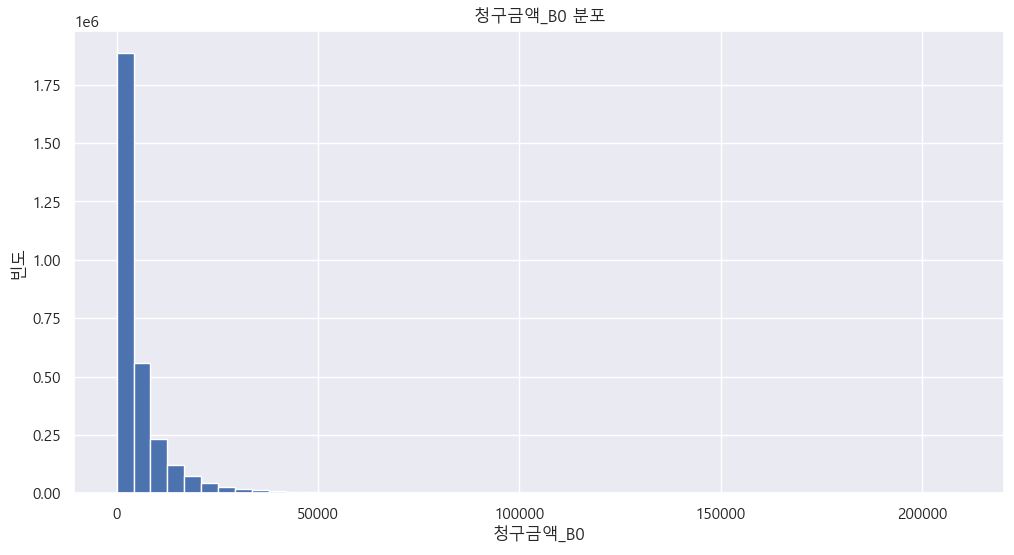

In [27]:
all_df['청구금액_B0'].hist(bins=50)
plt.xlabel('청구금액_B0')
plt.ylabel('빈도')
plt.title('청구금액_B0 분포')
plt.show()

In [28]:
desc = all_df['청구금액_B0'].describe()
print(desc.apply(lambda x: format(x, '.2f')))

count    3000000.00
mean        5060.25
std         7845.29
min            0.00
25%           99.00
50%         2404.00
75%         6505.00
max       210006.00
Name: 청구금액_B0, dtype: object


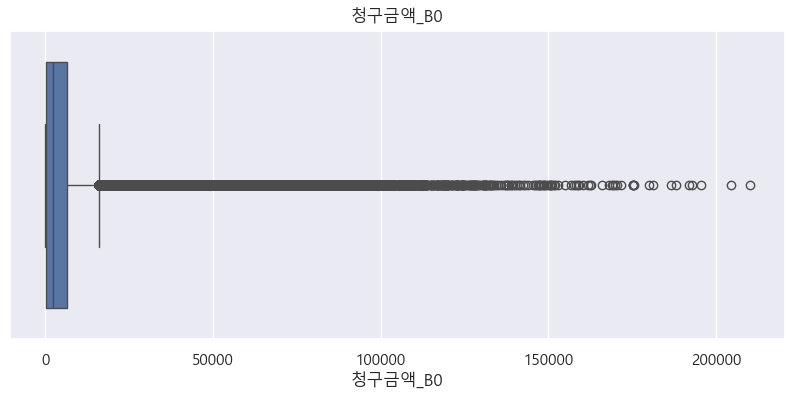

In [29]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=all_df['청구금액_B0'])
plt.title('청구금액_B0')
plt.show()

### 청구금액_R3M
- 청구금액 (최근3개월간)

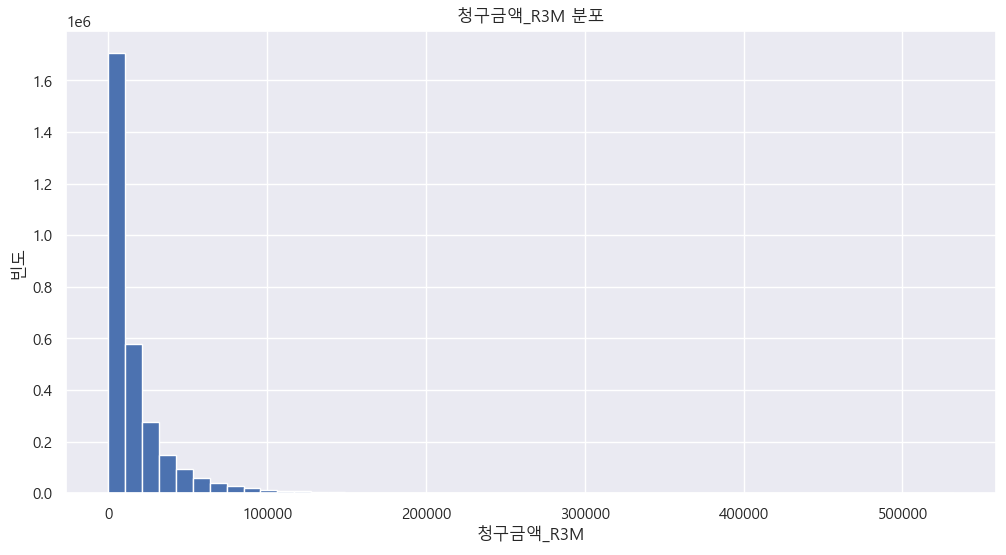

In [30]:
all_df['청구금액_R3M'].hist(bins=50)
plt.xlabel('청구금액_R3M')
plt.ylabel('빈도')
plt.title('청구금액_R3M 분포')
plt.show()

In [31]:
desc = all_df['청구금액_R3M'].describe()
print(desc.apply(lambda x: format(x, '.2f')))

count    3000000.00
mean       15714.17
std        23557.83
min            0.00
25%          525.00
50%         7740.00
75%        20435.00
max       532261.00
Name: 청구금액_R3M, dtype: object


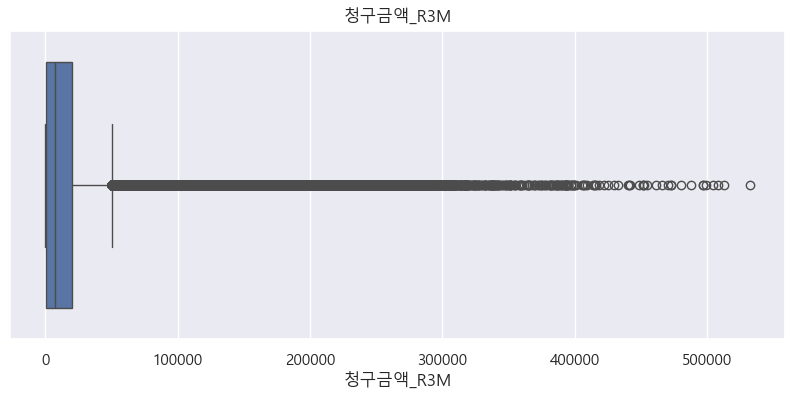

In [32]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=all_df['청구금액_R3M'])
plt.title('청구금액_R3M')
plt.show()

### 청구금액_R6M
- 청구서 발송 여부 (최근6개월간)

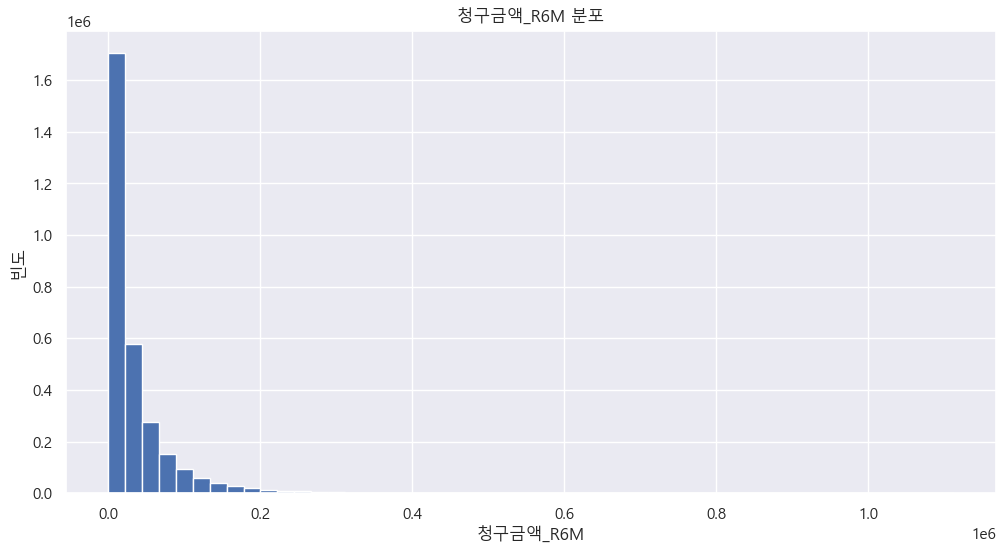

In [33]:
all_df['청구금액_R6M'].hist(bins=50)
plt.xlabel('청구금액_R6M')
plt.ylabel('빈도')
plt.title('청구금액_R6M 분포')
plt.show()

In [34]:
desc = all_df['청구금액_R6M'].describe()
print(desc.apply(lambda x: format(x, '.2f')))

count    3000000.00
mean       32965.30
std        48885.94
min            0.00
25%         1466.00
50%        16415.00
75%        42785.00
max      1112355.00
Name: 청구금액_R6M, dtype: object


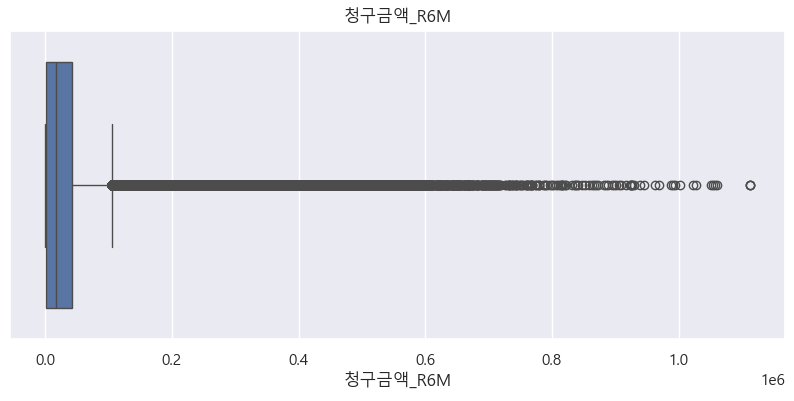

In [35]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=all_df['청구금액_R6M'])
plt.title('청구금액_R6M')
plt.show()

### 포인트_마일리지_건별_B0M
- 적립 마일리지 (당월)

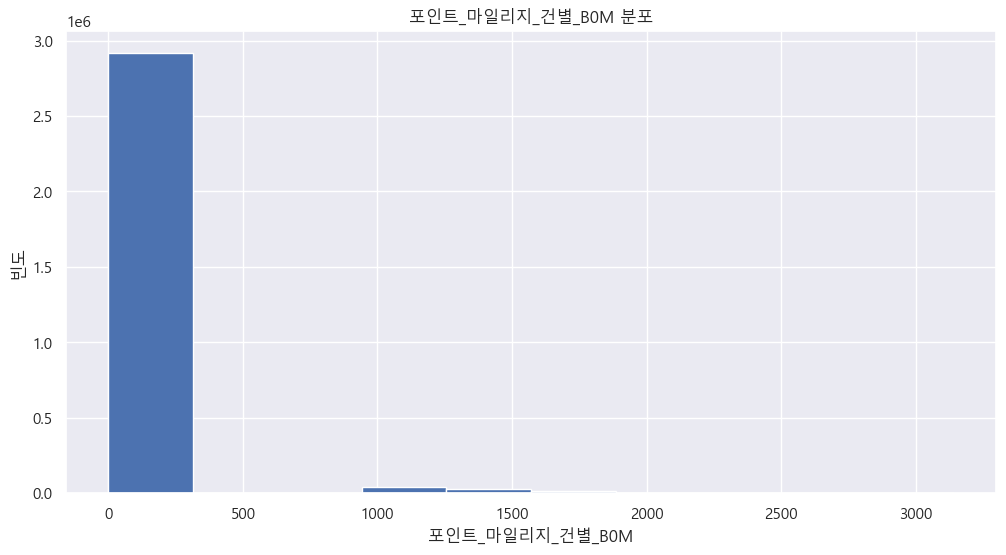

In [223]:
all_df['포인트_마일리지_건별_B0M'].hist()
plt.xlabel('포인트_마일리지_건별_B0M')
plt.ylabel('빈도')
plt.title('포인트_마일리지_건별_B0M 분포')
plt.show()

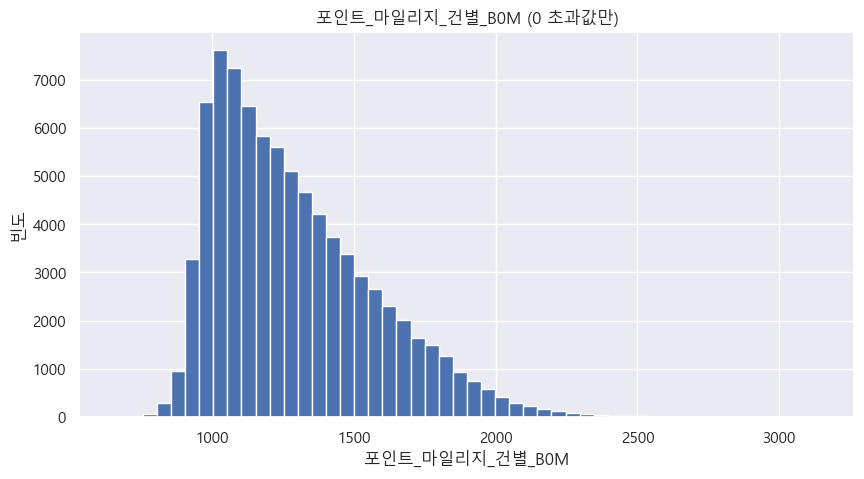

In [181]:
used = all_df[all_df['포인트_마일리지_건별_B0M'] > 0]

plt.figure(figsize=(10, 5))
plt.hist(
    used['포인트_마일리지_건별_B0M'],
    bins=50,
)
plt.title('포인트_마일리지_건별_B0M (0 초과값만)')
plt.xlabel('포인트_마일리지_건별_B0M')
plt.ylabel('빈도')
plt.show()

In [39]:
desc = all_df['포인트_마일리지_건별_B0M'].describe()
print(desc.apply(lambda x: format(x, '.2f')))

count    3000000.00
mean          35.75
std          216.97
min            0.00
25%            0.00
50%            0.00
75%            0.00
max         3141.00
Name: 포인트_마일리지_건별_B0M, dtype: object


<Axes: xlabel='포인트_마일리지_건별_B0M'>

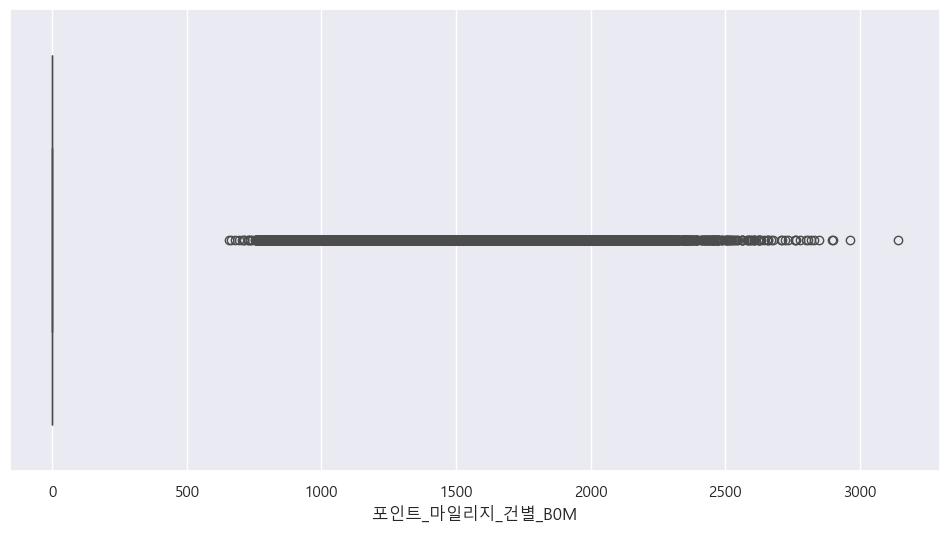

In [40]:
# 이상치 탐색
sns.boxplot(x=all_df['포인트_마일리지_건별_B0M'])

- 마일리지가 적립된 경우보다 적립되지 않은 경우가 많아서 적립 유무로 변환

### 포인트_마일리지_건별_R3M
- 적립 마일리지 (최근3개월간)

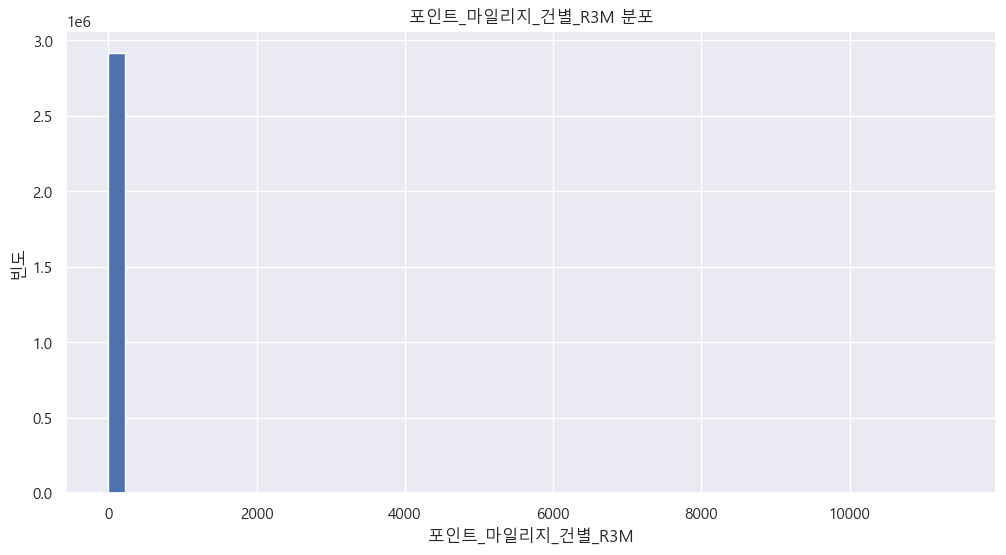

In [42]:
all_df['포인트_마일리지_건별_R3M'].hist(bins=50)
plt.xlabel('포인트_마일리지_건별_R3M')
plt.ylabel('빈도')
plt.title('포인트_마일리지_건별_R3M 분포')
plt.show()

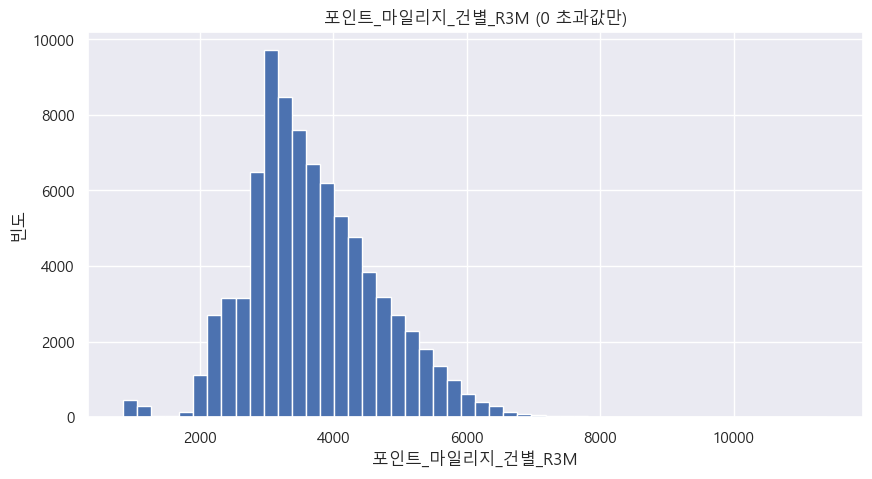

In [172]:
used = all_df[all_df['포인트_마일리지_건별_R3M'] > 0]

plt.figure(figsize=(10, 5))
plt.hist(
    used['포인트_마일리지_건별_R3M'],
    bins=50,
)
plt.title('포인트_마일리지_건별_R3M (0 초과값만)')
plt.xlabel('포인트_마일리지_건별_R3M')
plt.ylabel('빈도')
plt.show()

In [43]:
desc = all_df['포인트_마일리지_건별_R3M'].describe()
print(desc.apply(lambda x: format(x, '.2f')))

count    3000000.00
mean         103.68
std          631.73
min            0.00
25%            0.00
50%            0.00
75%            0.00
max        11404.00
Name: 포인트_마일리지_건별_R3M, dtype: object


<Axes: xlabel='포인트_마일리지_건별_R3M'>

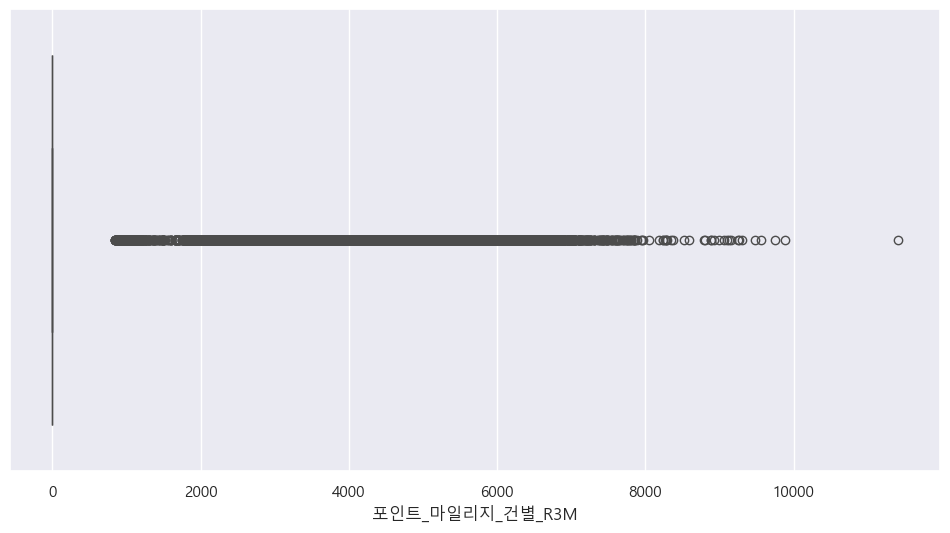

In [44]:
# 이상치 탐색
sns.boxplot(x=all_df['포인트_마일리지_건별_R3M'])

- 위와 동일하게 적립 유무로 나누는 것이 더 효과적으로 보인다.

### 포인트_포인트_건별_B0M
- 적립 포인트 (당월)

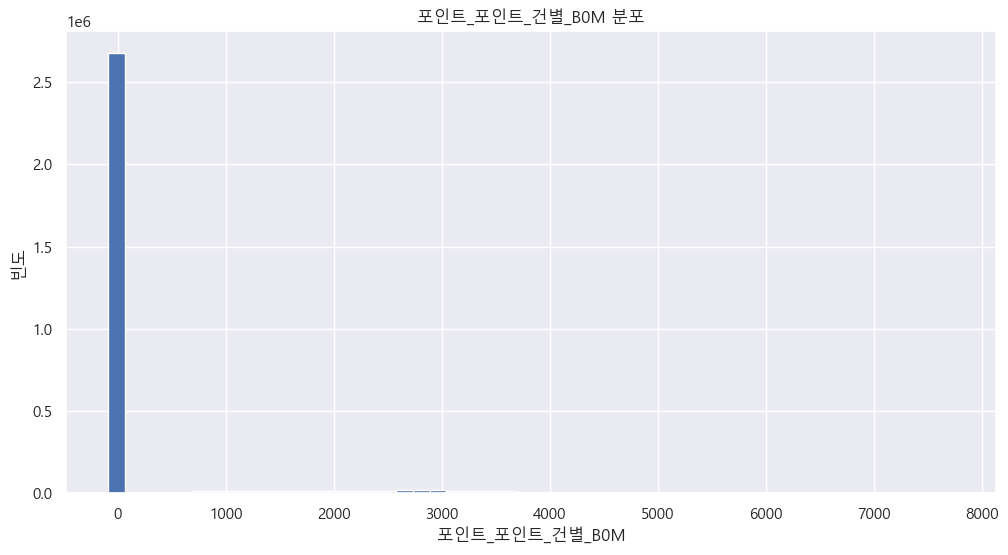

In [45]:
all_df['포인트_포인트_건별_B0M'].hist(bins=50)
plt.xlabel('포인트_포인트_건별_B0M')
plt.ylabel('빈도')
plt.title('포인트_포인트_건별_B0M 분포')
plt.show()

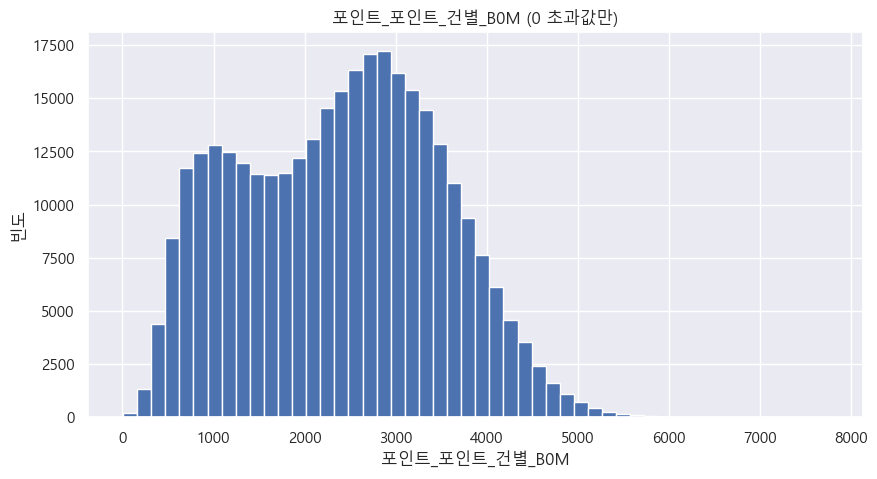

In [171]:
used = all_df[all_df['포인트_포인트_건별_B0M'] > 0]

plt.figure(figsize=(10, 5))
plt.hist(
    used['포인트_포인트_건별_B0M'],
    bins=50,
)
plt.title('포인트_포인트_건별_B0M (0 초과값만)')
plt.xlabel('포인트_포인트_건별_B0M')
plt.ylabel('빈도')
plt.show()

In [46]:
desc = all_df['포인트_포인트_건별_B0M'].describe()
print(desc.apply(lambda x: format(x, '.2f')))

count    3000000.00
mean         257.74
std          824.07
min          -87.00
25%            0.00
50%            0.00
75%            0.00
max         7741.00
Name: 포인트_포인트_건별_B0M, dtype: object


<Axes: xlabel='포인트_포인트_건별_B0M'>

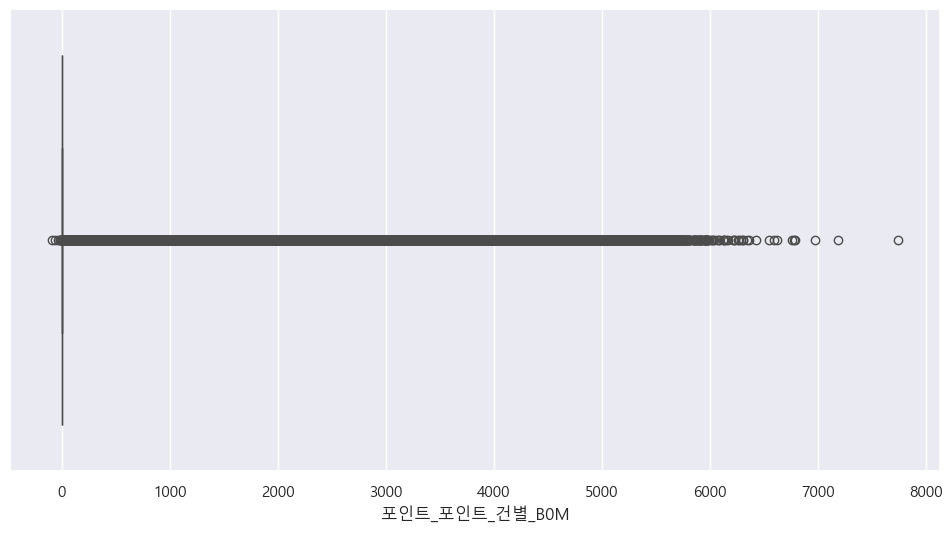

In [47]:
# 이상치 탐색
sns.boxplot(x=all_df['포인트_포인트_건별_B0M'])

### 포인트_마일리지_월적립_B0M
- 적립 마일리지 (당월)
- (이벤트 및 기타 사유로 적립)

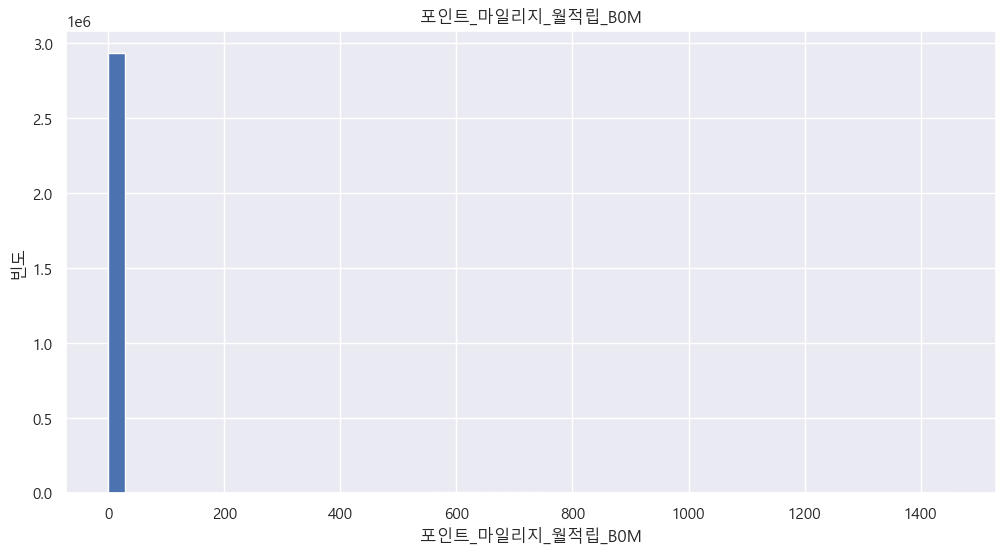

In [48]:
all_df['포인트_마일리지_월적립_B0M'].hist(bins=50)
plt.xlabel('포인트_마일리지_월적립_B0M')
plt.ylabel('빈도')
plt.title('포인트_마일리지_월적립_B0M')
plt.show()

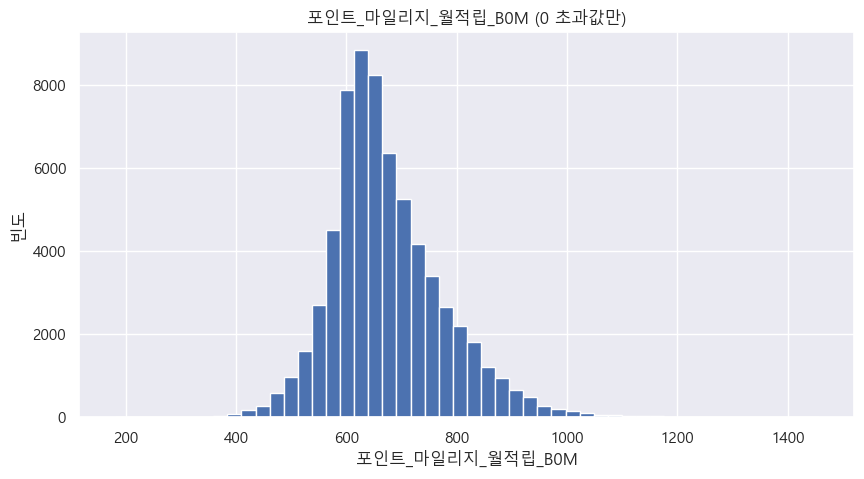

In [170]:
used = all_df[all_df['포인트_마일리지_월적립_B0M'] > 0]

plt.figure(figsize=(10, 5))
plt.hist(
    used['포인트_마일리지_월적립_B0M'],
    bins=50,
)
plt.title('포인트_마일리지_월적립_B0M (0 초과값만)')
plt.xlabel('포인트_마일리지_월적립_B0M')
plt.ylabel('빈도')
plt.show()

In [49]:
desc = all_df['포인트_마일리지_월적립_B0M'].describe()
print(desc.apply(lambda x: format(x, '.2f')))

count    3000000.00
mean          14.76
std           99.69
min            0.00
25%            0.00
50%            0.00
75%            0.00
max         1457.00
Name: 포인트_마일리지_월적립_B0M, dtype: object


<Axes: xlabel='포인트_마일리지_월적립_B0M'>

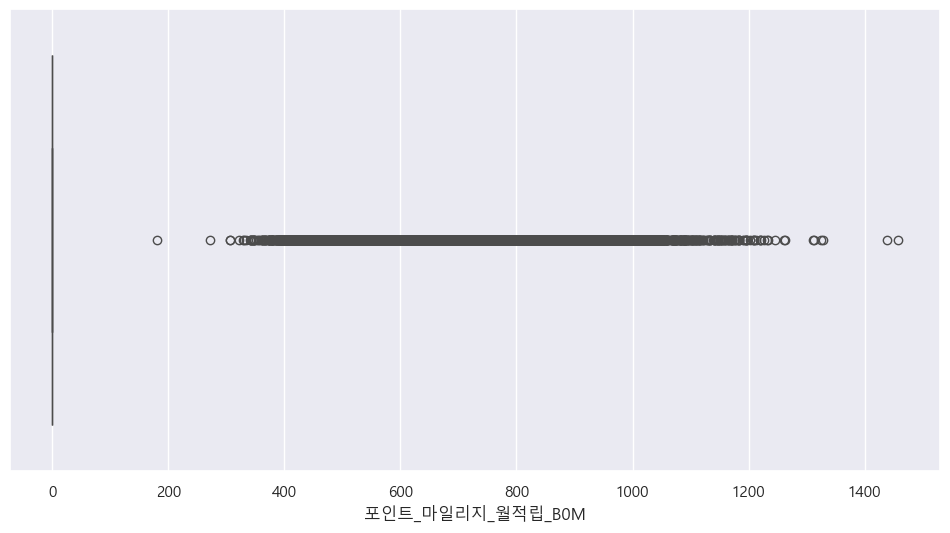

In [50]:
# 이상치 탐색
sns.boxplot(x=all_df['포인트_마일리지_월적립_B0M'])

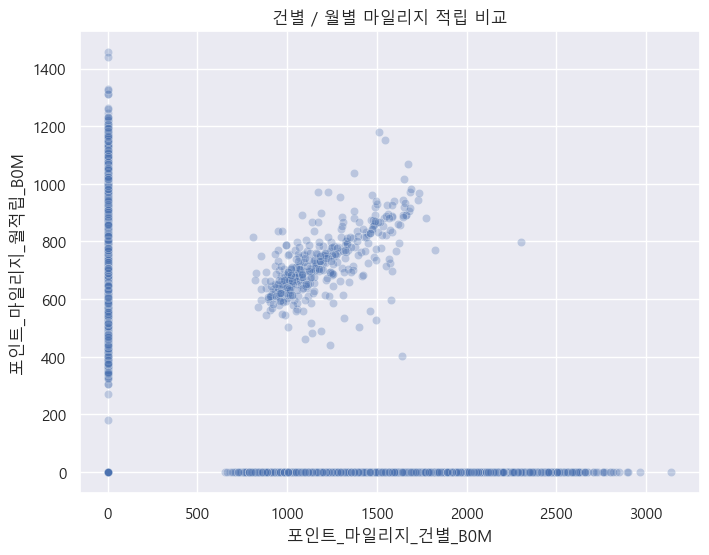

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=all_df, 
    x='포인트_마일리지_건별_B0M', 
    y='포인트_마일리지_월적립_B0M',
    alpha=0.3
)
plt.title('건별 / 월별 마일리지 적립 비교')
plt.show()


### 포인트_마일리지_월적립_R3M
- 적립 마일리지 (최근3개월간)
- (이벤트 및 기타 사유로 적립)

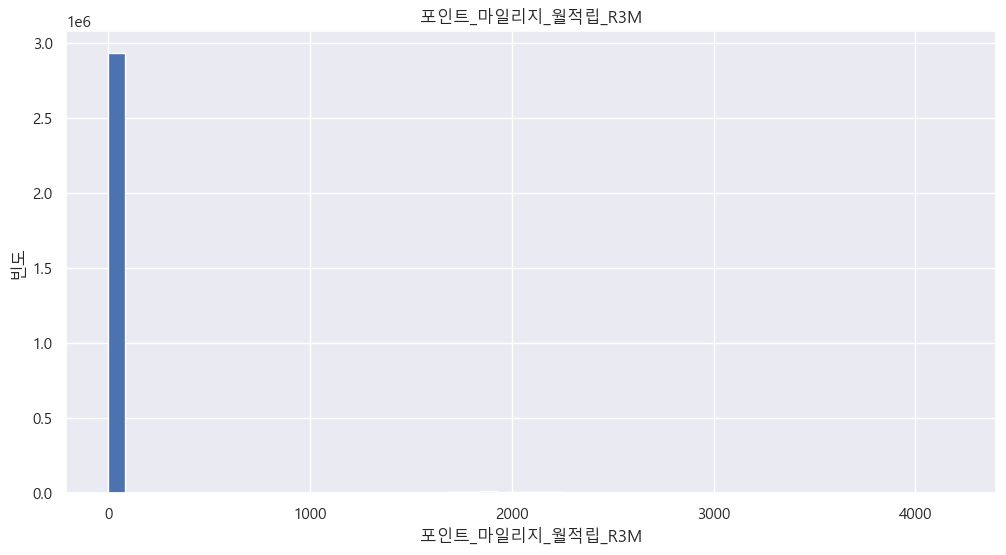

In [57]:
all_df['포인트_마일리지_월적립_R3M'].hist(bins=50)
plt.xlabel('포인트_마일리지_월적립_R3M')
plt.ylabel('빈도')
plt.title('포인트_마일리지_월적립_R3M')
plt.show()

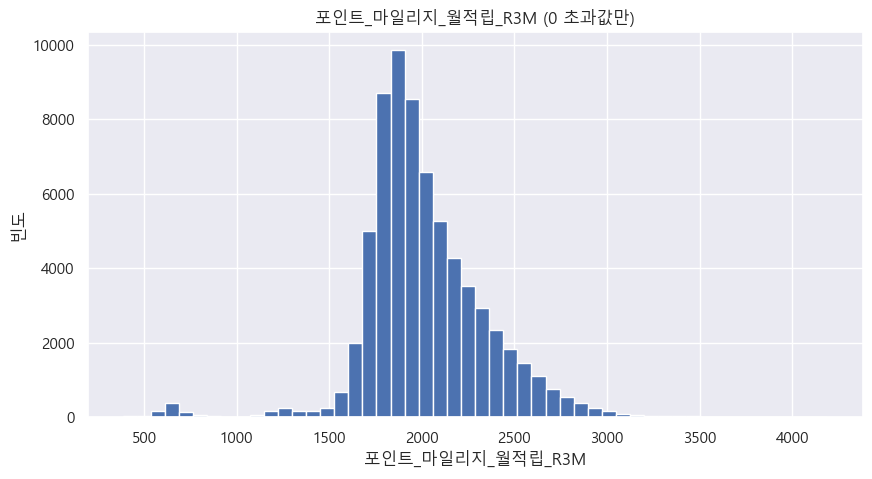

In [169]:
used = all_df[all_df['포인트_마일리지_월적립_R3M'] > 0]

plt.figure(figsize=(10, 5))
plt.hist(
    used['포인트_마일리지_월적립_R3M'],
    bins=50,
)
plt.title('포인트_마일리지_월적립_R3M (0 초과값만)')
plt.xlabel('포인트_마일리지_월적립_R3M')
plt.ylabel('빈도')
plt.show()

In [58]:
desc = all_df['포인트_마일리지_월적립_R3M'].describe()
print(desc.apply(lambda x: format(x, '.2f')))

count    3000000.00
mean          45.71
std          303.76
min            0.00
25%            0.00
50%            0.00
75%            0.00
max         4190.00
Name: 포인트_마일리지_월적립_R3M, dtype: object


<Axes: xlabel='포인트_마일리지_월적립_R3M'>

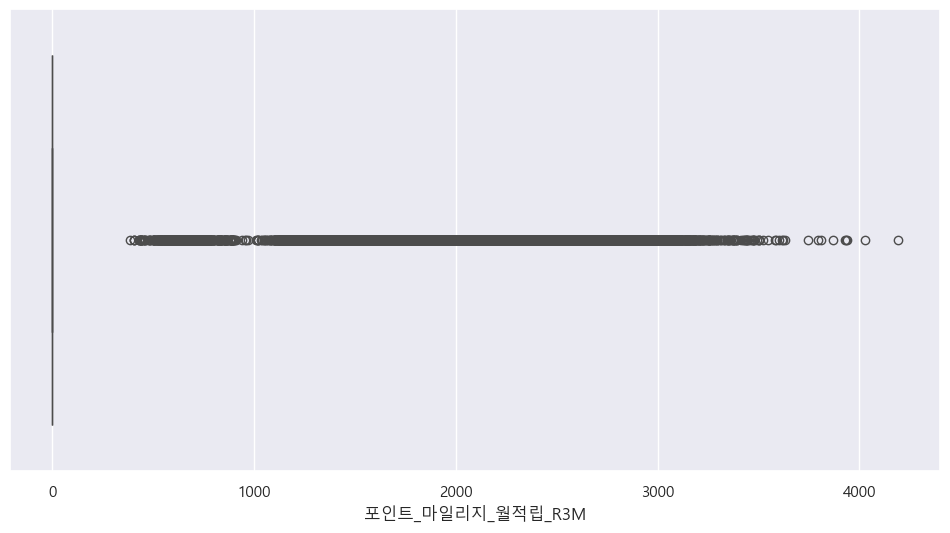

In [59]:
# 이상치 탐색
sns.boxplot(x=all_df['포인트_마일리지_월적립_R3M'])

### 포인트_포인트_월적립_B0M
- 적립 포인트 (당월)
- (이벤트 및 기타 사유로 적립)

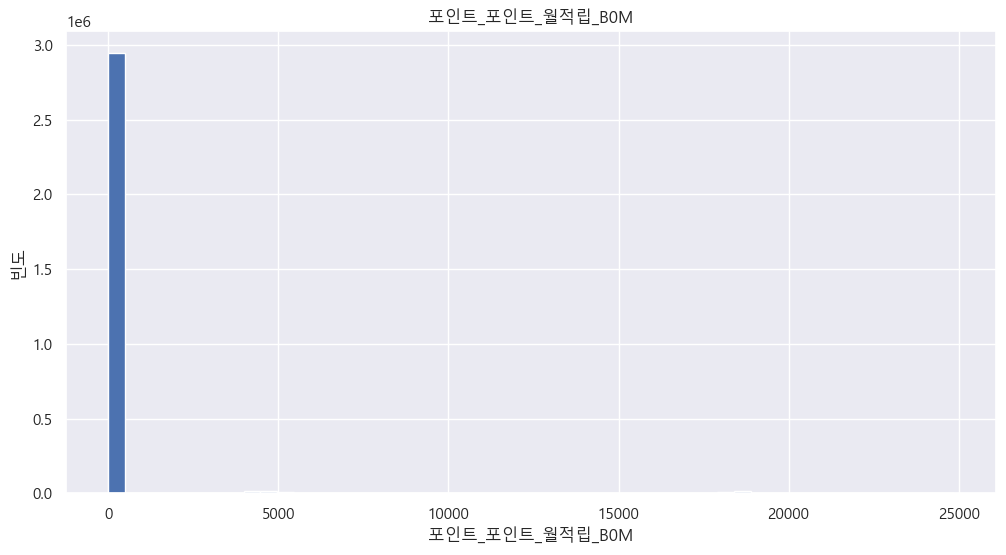

In [63]:
all_df['포인트_포인트_월적립_B0M'].hist(bins=50)
plt.xlabel('포인트_포인트_월적립_B0M')
plt.ylabel('빈도')
plt.title('포인트_포인트_월적립_B0M')
plt.show()

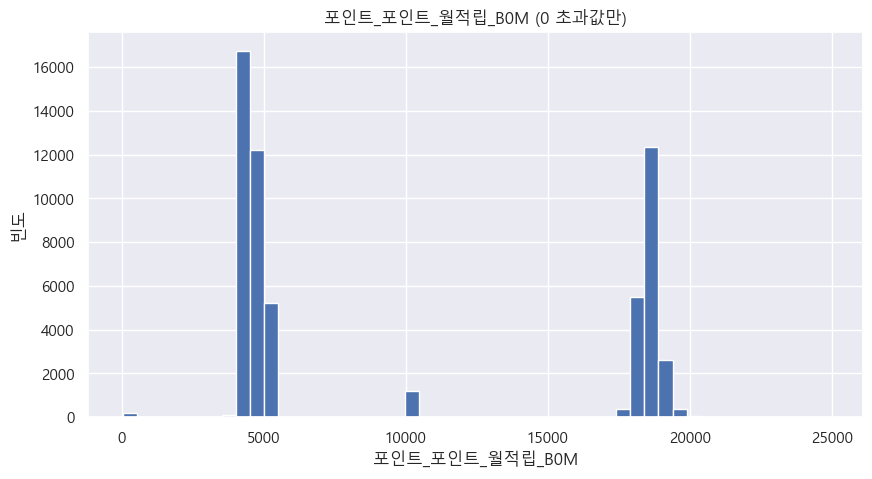

In [168]:
used = all_df[all_df['포인트_포인트_월적립_B0M'] > 0]

plt.figure(figsize=(10, 5))
plt.hist(
    used['포인트_포인트_월적립_B0M'],
    bins=50,
)
plt.title('포인트_포인트_월적립_B0M (0 초과값만)')
plt.xlabel('포인트_포인트_월적립_B0M')
plt.ylabel('빈도')
plt.show()

In [61]:
desc = all_df['포인트_포인트_월적립_B0M'].describe()
print(desc.apply(lambda x: format(x, '.2f')))

count    3000000.00
mean         188.45
std         1643.15
min            0.00
25%            0.00
50%            0.00
75%            0.00
max        24854.00
Name: 포인트_포인트_월적립_B0M, dtype: object


<Axes: xlabel='포인트_포인트_월적립_B0M'>

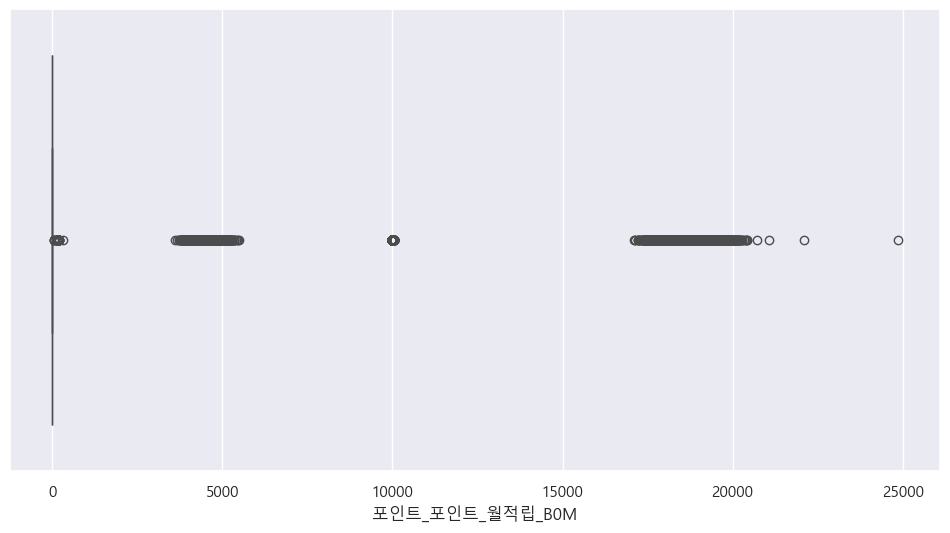

In [62]:
# 이상치 탐색
sns.boxplot(x=all_df['포인트_포인트_월적립_B0M'])

### 포인트_포인트_월적립_R3M
- 적립 포인트 (최근3개월간)
- (이벤트 및 기타 사유로 적립)

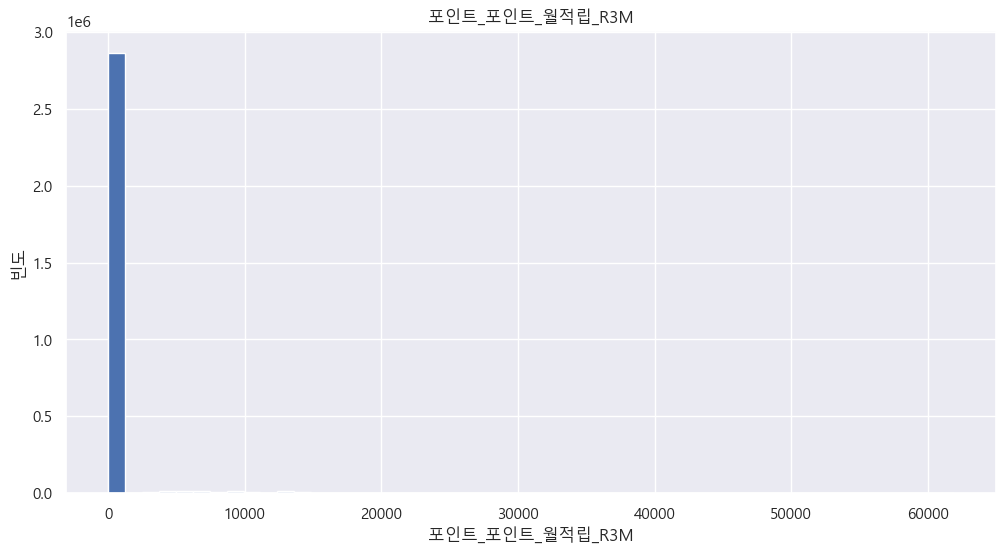

In [64]:
all_df['포인트_포인트_월적립_R3M'].hist(bins=50)
plt.xlabel('포인트_포인트_월적립_R3M')
plt.ylabel('빈도')
plt.title('포인트_포인트_월적립_R3M')
plt.show()

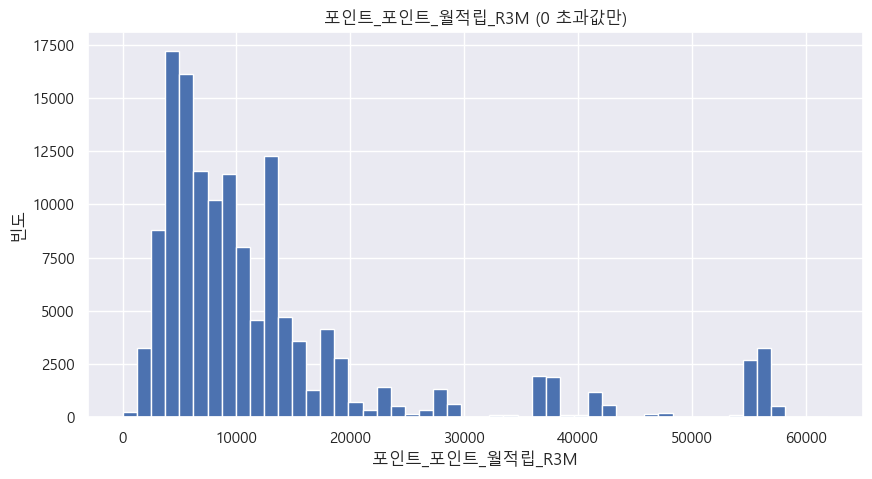

In [167]:
used = all_df[all_df['포인트_포인트_월적립_R3M'] > 0]

plt.figure(figsize=(10, 5))
plt.hist(
    used['포인트_포인트_월적립_R3M'],
    bins=50,
)
plt.title('포인트_포인트_월적립_R3M (0 초과값만)')
plt.xlabel('포인트_포인트_월적립_R3M')
plt.ylabel('빈도')
plt.show()

In [65]:
desc = all_df['포인트_포인트_월적립_R3M'].describe()
print(desc.apply(lambda x: format(x, '.2f')))

count    3000000.00
mean         595.91
std         3826.21
min            0.00
25%            0.00
50%            0.00
75%            0.00
max        61907.00
Name: 포인트_포인트_월적립_R3M, dtype: object


<Axes: xlabel='포인트_포인트_월적립_R3M'>

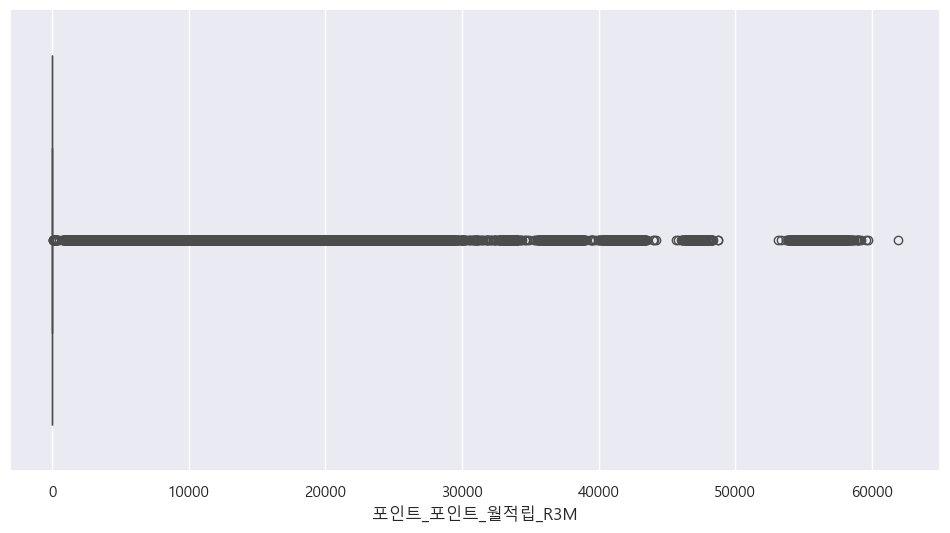

In [66]:
# 이상치 탐색
sns.boxplot(x=all_df['포인트_포인트_월적립_R3M'])

### 포인트_적립포인트_R12M
- 적립 포인트 (최근1년간)
- (마일리지 제외)

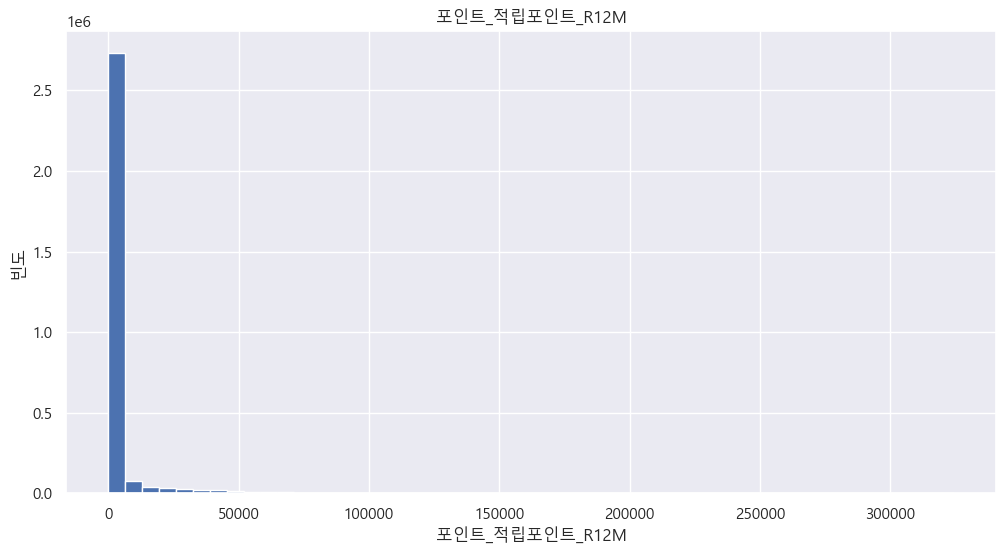

In [67]:
all_df['포인트_적립포인트_R12M'].hist(bins=50)
plt.xlabel('포인트_적립포인트_R12M')
plt.ylabel('빈도')
plt.title('포인트_적립포인트_R12M')
plt.show()

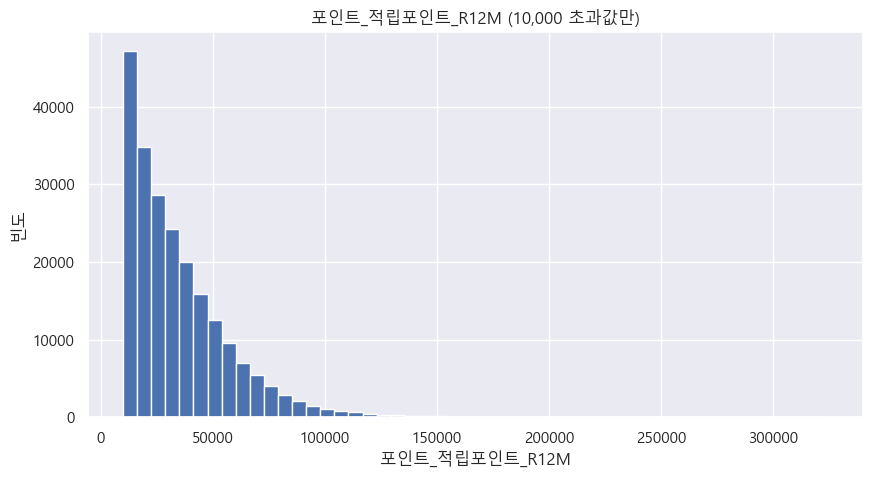

In [202]:
used = all_df[all_df['포인트_적립포인트_R12M'] > 10000]

plt.figure(figsize=(10, 5))
plt.hist(
    used['포인트_적립포인트_R12M'],
    bins=50,
)
plt.title('포인트_적립포인트_R12M (10,000 초과값만)')
plt.xlabel('포인트_적립포인트_R12M')
plt.ylabel('빈도')
plt.show()

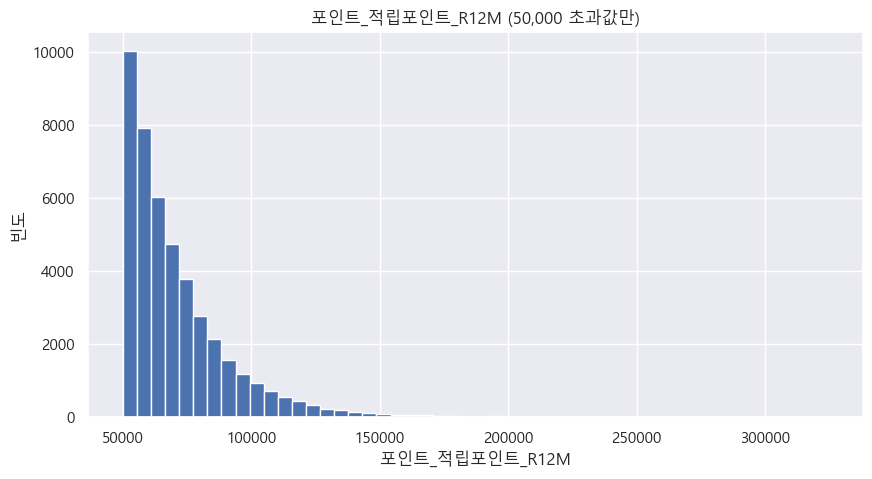

In [201]:
used = all_df[all_df['포인트_적립포인트_R12M'] > 50000]

plt.figure(figsize=(10, 5))
plt.hist(
    used['포인트_적립포인트_R12M'],
    bins=50,
)
plt.title('포인트_적립포인트_R12M (50,000 초과값만)')
plt.xlabel('포인트_적립포인트_R12M')
plt.ylabel('빈도')
plt.show()

In [68]:
desc = all_df['포인트_적립포인트_R12M'].describe()
print(desc.apply(lambda x: format(x, '.2f')))

count    3000000.00
mean        3047.33
std        10969.18
min            0.00
25%            0.00
50%            0.00
75%            0.00
max       324302.00
Name: 포인트_적립포인트_R12M, dtype: object


<Axes: xlabel='포인트_적립포인트_R12M'>

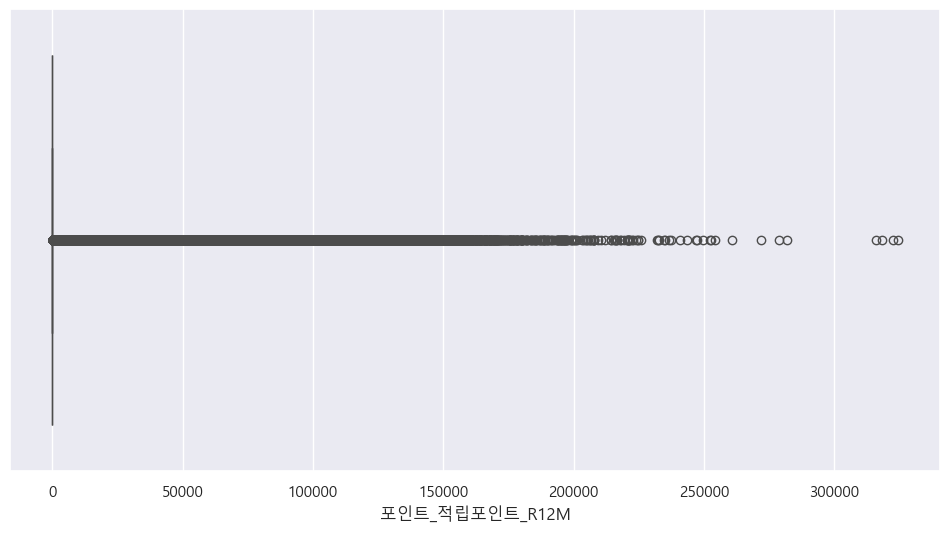

In [69]:
# 이상치 탐색
sns.boxplot(x=all_df['포인트_적립포인트_R12M'])

### 포인트_적립포인트_R3M
- 적립 포인트 (최근3개월간)
- (마일리지 제외)

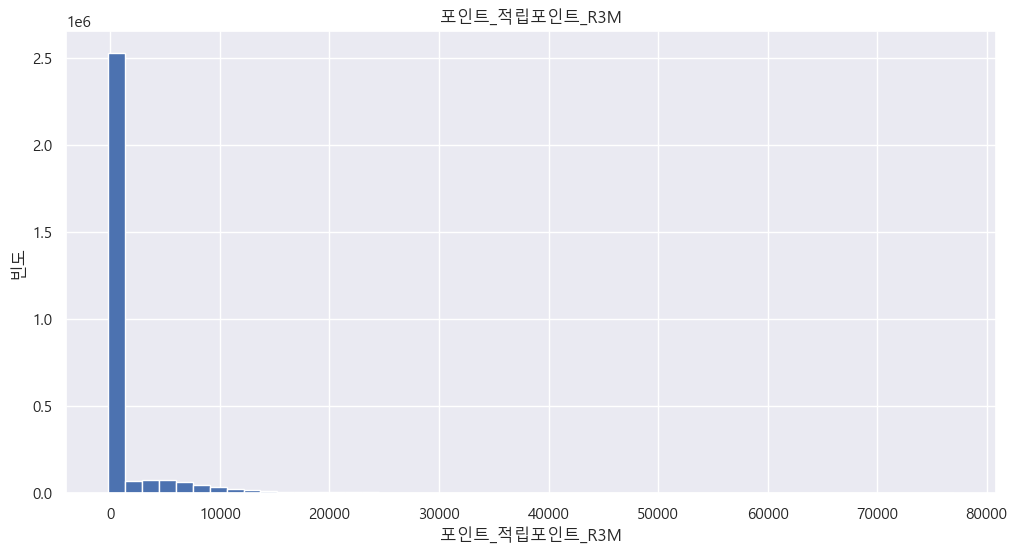

In [70]:
all_df['포인트_적립포인트_R3M'].hist(bins=50)
plt.xlabel('포인트_적립포인트_R3M')
plt.ylabel('빈도')
plt.title('포인트_적립포인트_R3M')
plt.show()

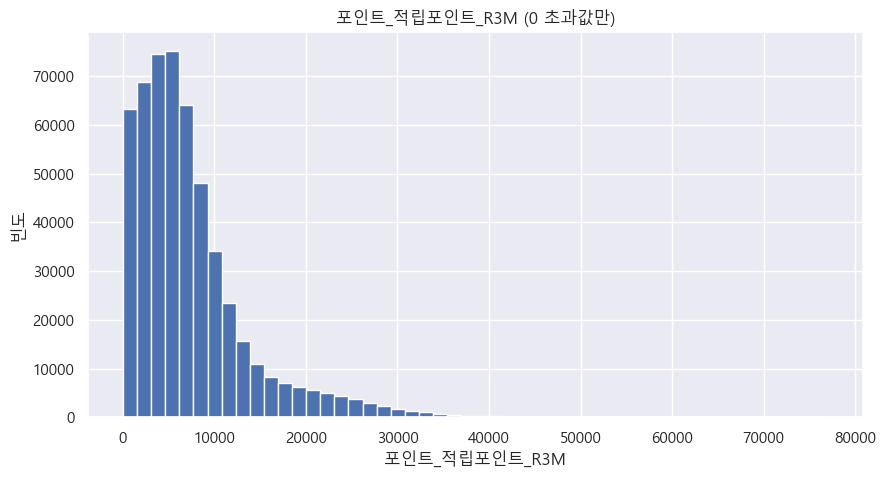

In [189]:
used = all_df[all_df['포인트_적립포인트_R3M'] > 0]

plt.figure(figsize=(10, 5))
plt.hist(
    used['포인트_적립포인트_R3M'],
    bins=50,
)
plt.title('포인트_적립포인트_R3M (0 초과값만)')
plt.xlabel('포인트_적립포인트_R3M')
plt.ylabel('빈도')
plt.show()

In [71]:
desc = all_df['포인트_적립포인트_R3M'].describe()
print(desc.apply(lambda x: format(x, '.2f')))

count    3000000.00
mean        1297.46
std         3856.01
min         -199.00
25%            0.00
50%            0.00
75%            0.00
max        76995.00
Name: 포인트_적립포인트_R3M, dtype: object


<Axes: xlabel='포인트_적립포인트_R3M'>

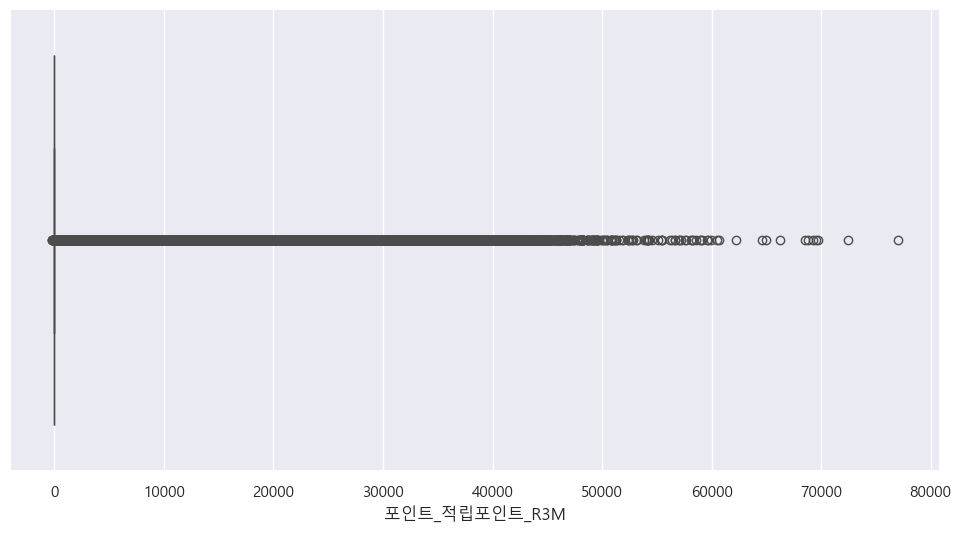

In [72]:
# 이상치 탐색
sns.boxplot(x=all_df['포인트_적립포인트_R3M'])

### 포인트_이용포인트_R12M
- 이용 포인트 (최근 1년간)(마일리지 제외)

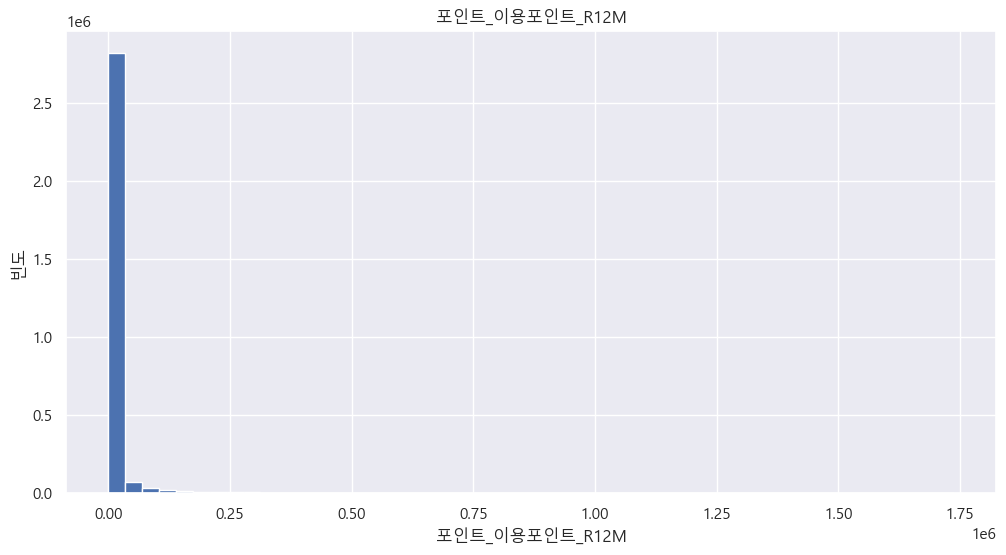

In [75]:
all_df['포인트_이용포인트_R12M'].hist(bins=50)
plt.xlabel('포인트_이용포인트_R12M')
plt.ylabel('빈도')
plt.title('포인트_이용포인트_R12M')
plt.show()

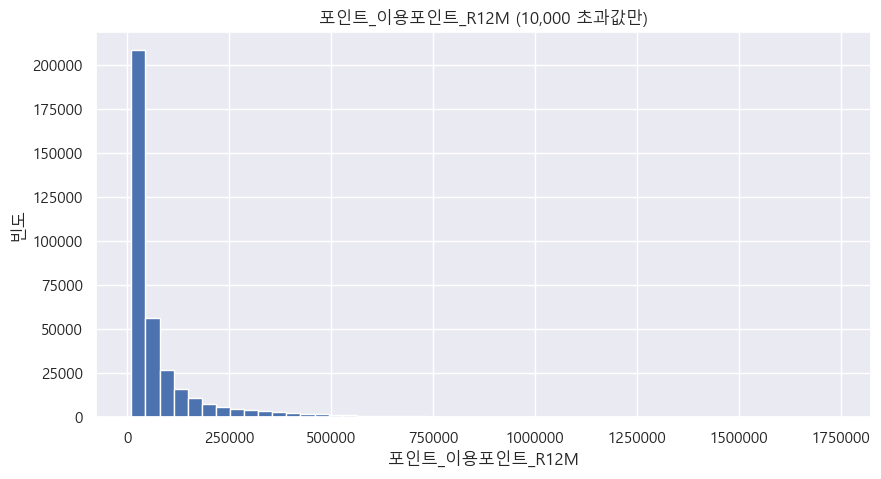

In [200]:
used = all_df[all_df['포인트_이용포인트_R12M'] > 10000]

plt.figure(figsize=(10, 5))
plt.hist(
    used['포인트_이용포인트_R12M'],
    bins=50,
)
plt.title('포인트_이용포인트_R12M (10,000 초과값만)')
plt.xlabel('포인트_이용포인트_R12M')
plt.ylabel('빈도')

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='x')

plt.show()

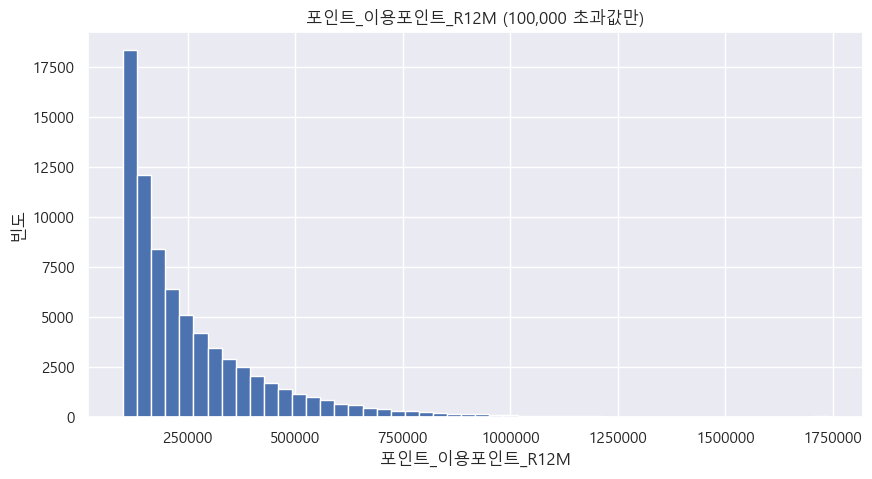

In [199]:
used = all_df[all_df['포인트_이용포인트_R12M'] > 100000]

plt.figure(figsize=(10, 5))
plt.hist(
    used['포인트_이용포인트_R12M'],
    bins=50,
)
plt.title('포인트_이용포인트_R12M (100,000 초과값만)')
plt.xlabel('포인트_이용포인트_R12M')
plt.ylabel('빈도')

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='x')

plt.show()

In [76]:
desc = all_df['포인트_이용포인트_R12M'].describe()
print(desc.apply(lambda x: format(x, '.2f')))

count    3000000.00
mean       10468.63
std        50907.14
min            0.00
25%            0.00
50%            0.00
75%         2369.00
max      1737161.00
Name: 포인트_이용포인트_R12M, dtype: object


<Axes: xlabel='포인트_이용포인트_R12M'>

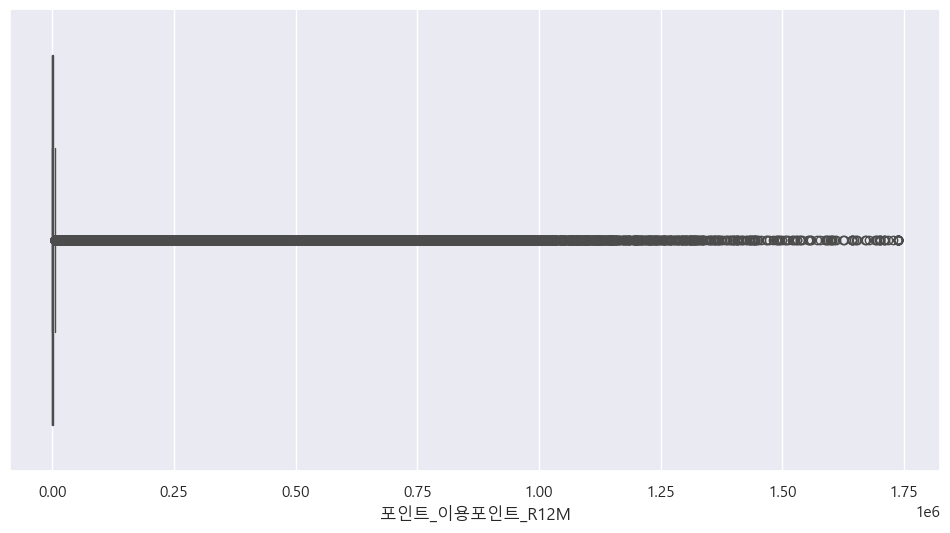

In [77]:
# 이상치 탐색
sns.boxplot(x=all_df['포인트_이용포인트_R12M'])

### 포인트_이용포인트_R3M
- 이용 포인트 (최근3개월간)(마일리지 제외)

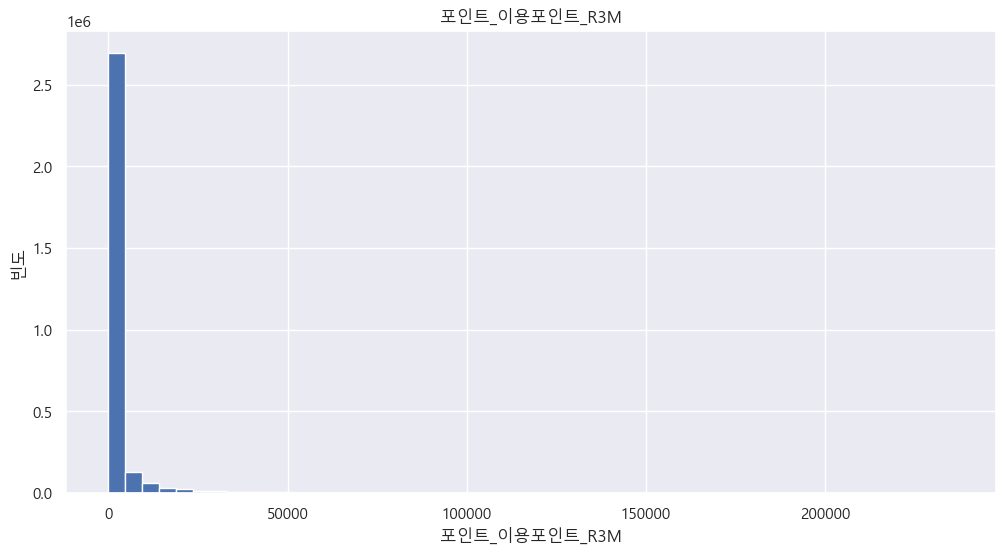

In [78]:
all_df['포인트_이용포인트_R3M'].hist(bins=50)
plt.xlabel('포인트_이용포인트_R3M')
plt.ylabel('빈도')
plt.title('포인트_이용포인트_R3M')
plt.show()

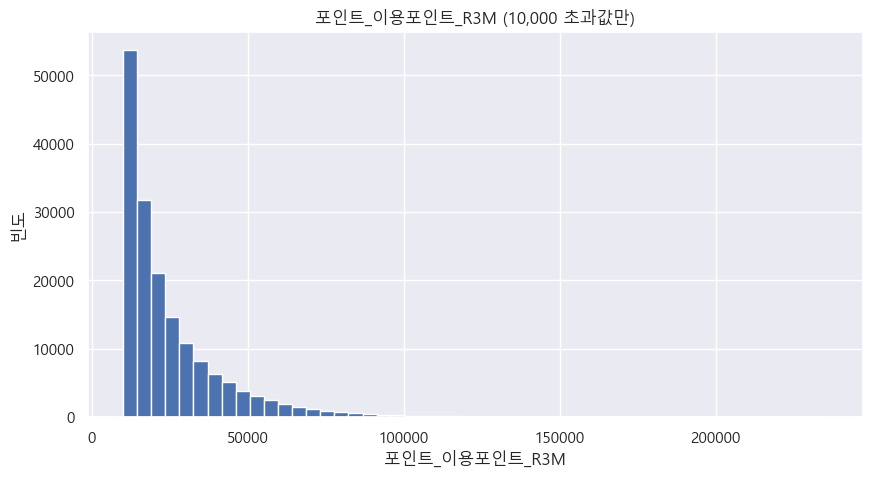

In [206]:
used = all_df[all_df['포인트_이용포인트_R3M'] > 10000]

plt.figure(figsize=(10, 5))
plt.hist(
    used['포인트_이용포인트_R3M'],
    bins=50,
)
plt.title('포인트_이용포인트_R3M (10,000 초과값만)')
plt.xlabel('포인트_이용포인트_R3M')
plt.ylabel('빈도')
plt.show()

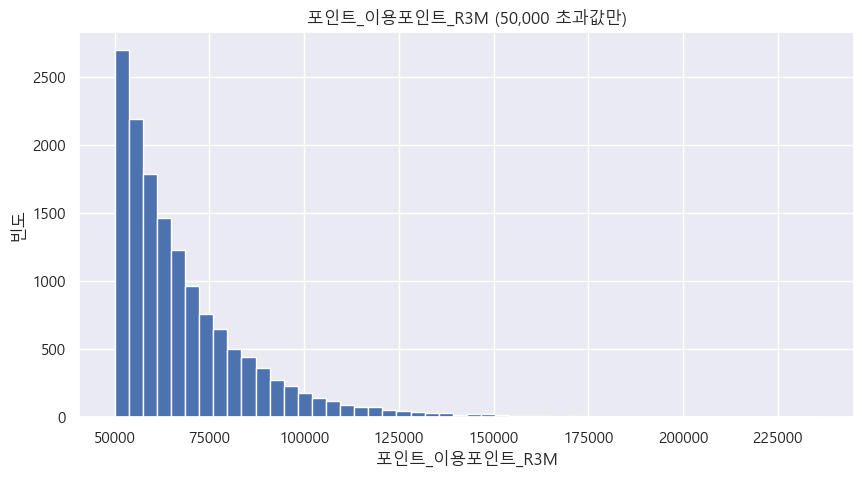

In [208]:
used = all_df[all_df['포인트_이용포인트_R3M'] > 50000]

plt.figure(figsize=(10, 5))
plt.hist(
    used['포인트_이용포인트_R3M'],
    bins=50,
)
plt.title('포인트_이용포인트_R3M (50,000 초과값만)')
plt.xlabel('포인트_이용포인트_R3M')
plt.ylabel('빈도')
plt.show()

In [79]:
desc = all_df['포인트_이용포인트_R3M'].describe()
print(desc.apply(lambda x: format(x, '.2f')))

count    3000000.00
mean        1983.60
std         7148.68
min          -20.00
25%            0.00
50%            0.00
75%            0.00
max       235914.00
Name: 포인트_이용포인트_R3M, dtype: object


<Axes: xlabel='포인트_이용포인트_R3M'>

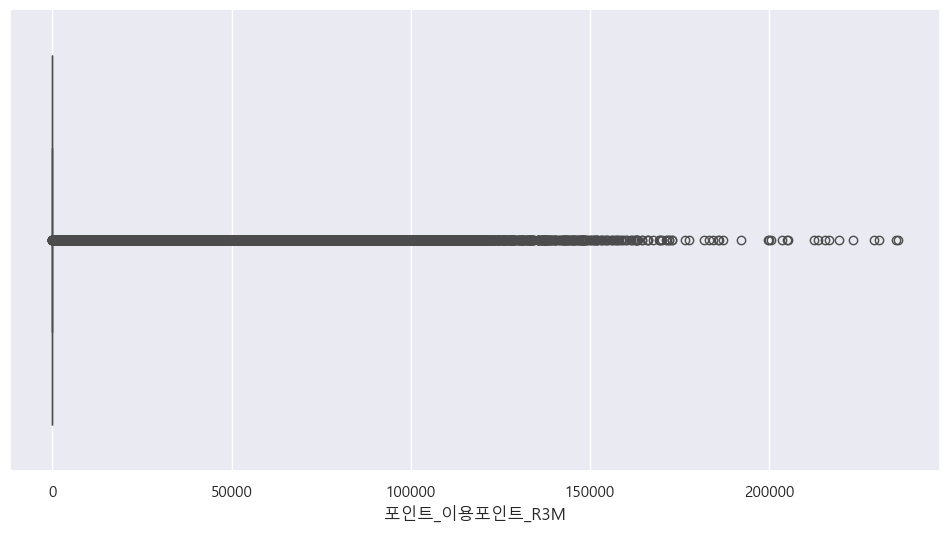

In [80]:
# 이상치 탐색
sns.boxplot(x=all_df['포인트_이용포인트_R3M'])

### 포인트_잔여포인트_B0M
- 잔여 포인트 (당월)(마일리지 제외)

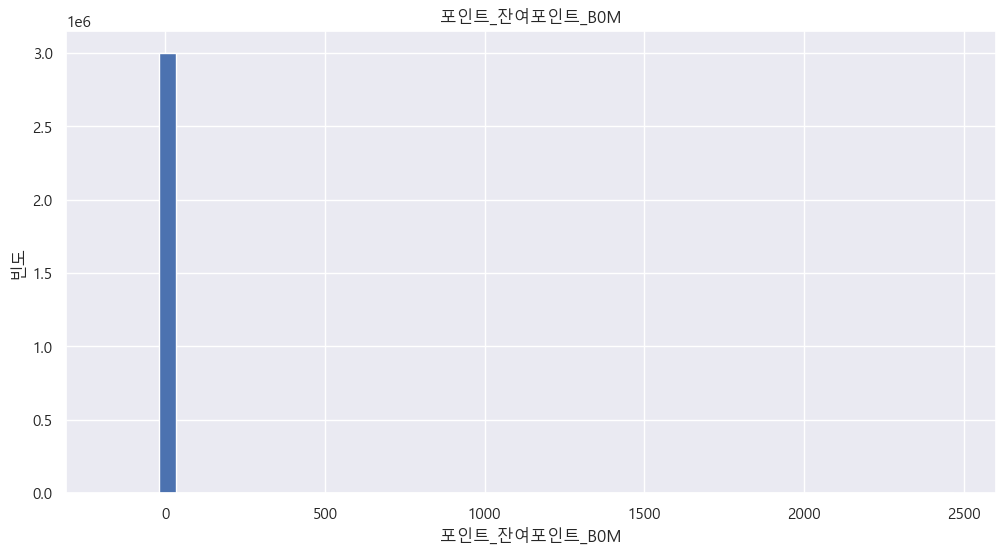

In [81]:
all_df['포인트_잔여포인트_B0M'].hist(bins=50)
plt.xlabel('포인트_잔여포인트_B0M')
plt.ylabel('빈도')
plt.title('포인트_잔여포인트_B0M')
plt.show()

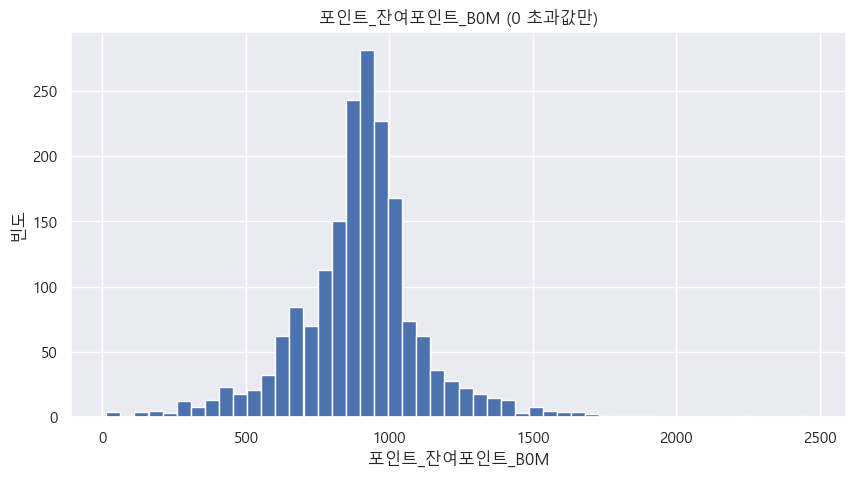

In [209]:
used = all_df[all_df['포인트_잔여포인트_B0M'] > 0]

plt.figure(figsize=(10, 5))
plt.hist(
    used['포인트_잔여포인트_B0M'],
    bins=50,
)
plt.title('포인트_잔여포인트_B0M (0 초과값만)')
plt.xlabel('포인트_잔여포인트_B0M')
plt.ylabel('빈도')
plt.show()

In [82]:
desc = all_df['포인트_잔여포인트_B0M'].describe()
print(desc.apply(lambda x: format(x, '.2f')))

count    3000000.00
mean           0.55
std           22.87
min         -178.00
25%            0.00
50%            0.00
75%            0.00
max         2469.00
Name: 포인트_잔여포인트_B0M, dtype: object


<Axes: xlabel='포인트_잔여포인트_B0M'>

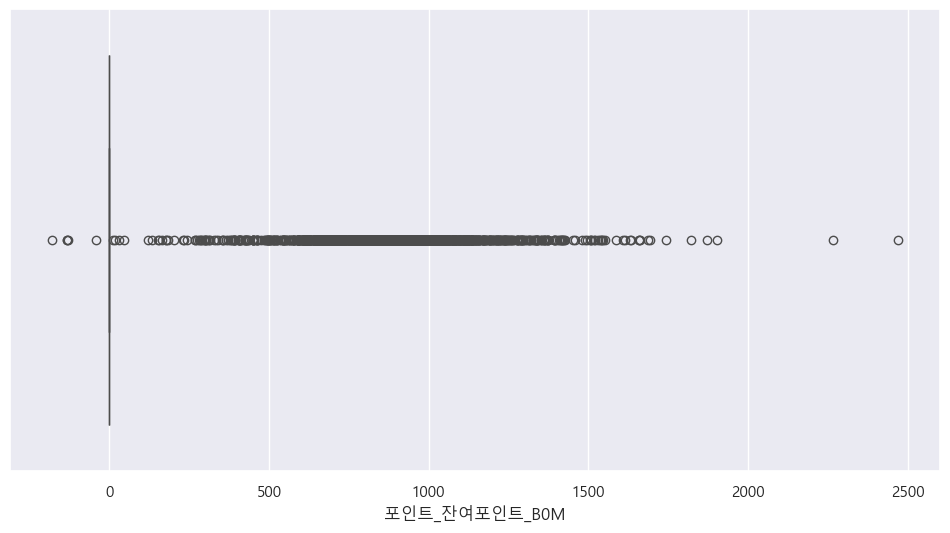

In [83]:
# 이상치 탐색
sns.boxplot(x=all_df['포인트_잔여포인트_B0M'])

### 마일_적립포인트_R12M
- 적립 마일리지 (최근1년간)

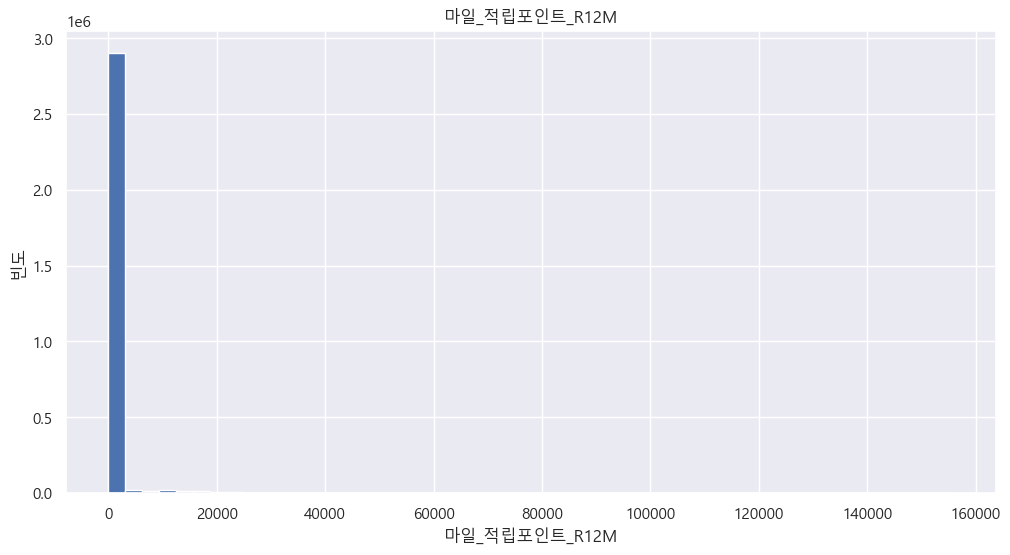

In [84]:
all_df['마일_적립포인트_R12M'].hist(bins=50)
plt.xlabel('마일_적립포인트_R12M')
plt.ylabel('빈도')
plt.title('마일_적립포인트_R12M')
plt.show()

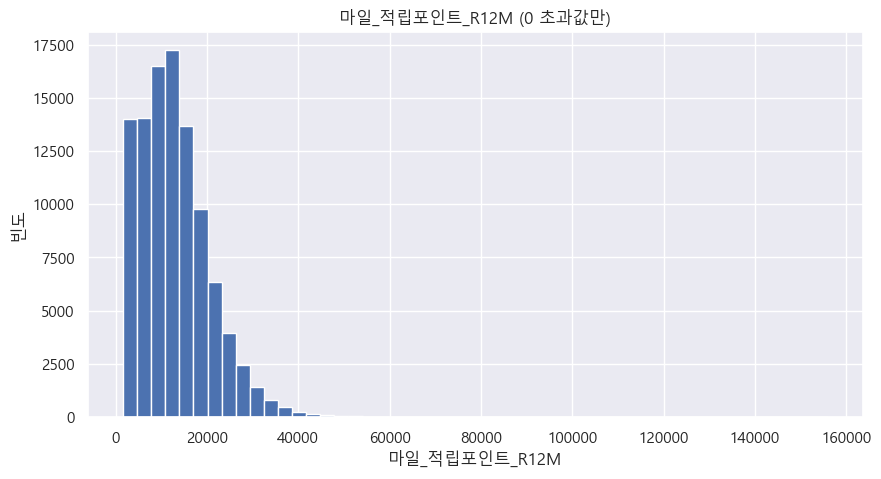

In [210]:
used = all_df[all_df['마일_적립포인트_R12M'] > 0]

plt.figure(figsize=(10, 5))
plt.hist(
    used['마일_적립포인트_R12M'],
    bins=50,
)
plt.title('마일_적립포인트_R12M (0 초과값만)')
plt.xlabel('마일_적립포인트_R12M')
plt.ylabel('빈도')
plt.show()

In [85]:
desc = all_df['마일_적립포인트_R12M'].describe()
print(desc.apply(lambda x: format(x, '.2f')))

count    3000000.00
mean         439.79
std         2736.60
min            0.00
25%            0.00
50%            0.00
75%            0.00
max       155923.00
Name: 마일_적립포인트_R12M, dtype: object


<Axes: xlabel='마일_적립포인트_R12M'>

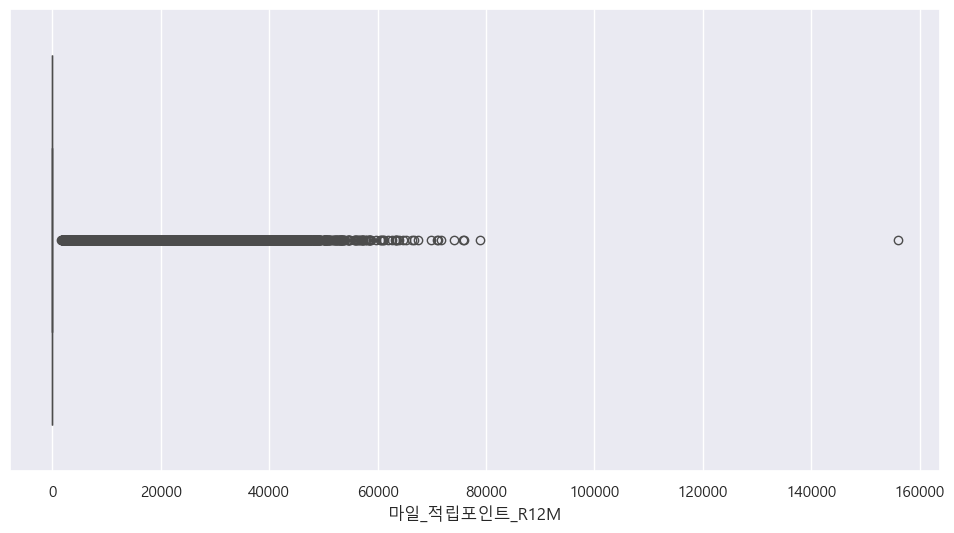

In [86]:
# 이상치 탐색
sns.boxplot(x=all_df['마일_적립포인트_R12M'])

### 마일_적립포인트_R3M
- 적립 마일리지 (최근3개월간)

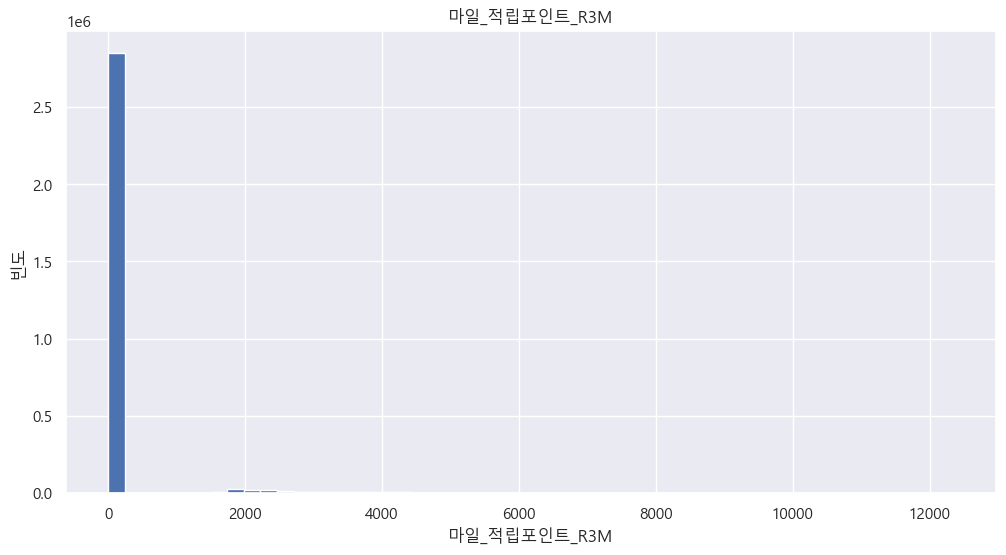

In [88]:
all_df['마일_적립포인트_R3M'].hist(bins=50)
plt.xlabel('마일_적립포인트_R3M')
plt.ylabel('빈도')
plt.title('마일_적립포인트_R3M')
plt.show()

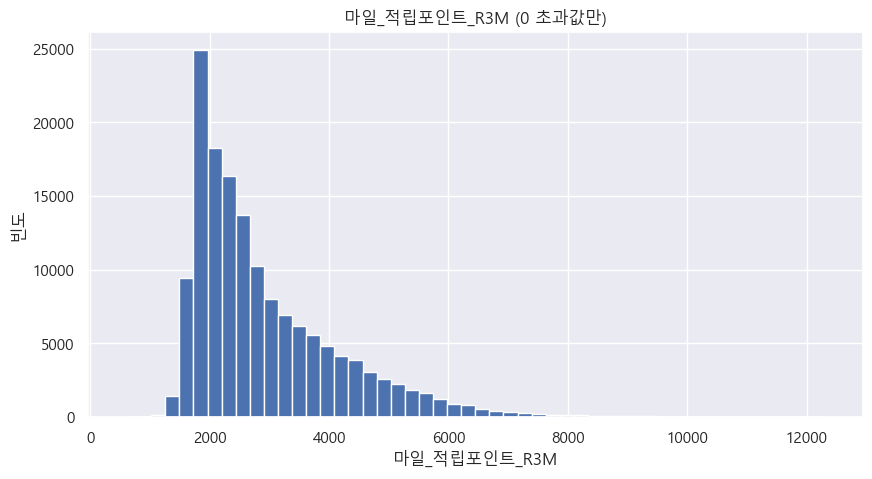

In [211]:
used = all_df[all_df['마일_적립포인트_R3M'] > 0]

plt.figure(figsize=(10, 5))
plt.hist(
    used['마일_적립포인트_R3M'],
    bins=50,
)
plt.title('마일_적립포인트_R3M (0 초과값만)')
plt.xlabel('마일_적립포인트_R3M')
plt.ylabel('빈도')
plt.show()

In [90]:
desc = all_df['마일_적립포인트_R3M'].describe()
print(desc.apply(lambda x: format(x, '.2f')))

count    3000000.00
mean         147.17
std          698.36
min            0.00
25%            0.00
50%            0.00
75%            0.00
max        12352.00
Name: 마일_적립포인트_R3M, dtype: object


<Axes: xlabel='마일_적립포인트_R3M'>

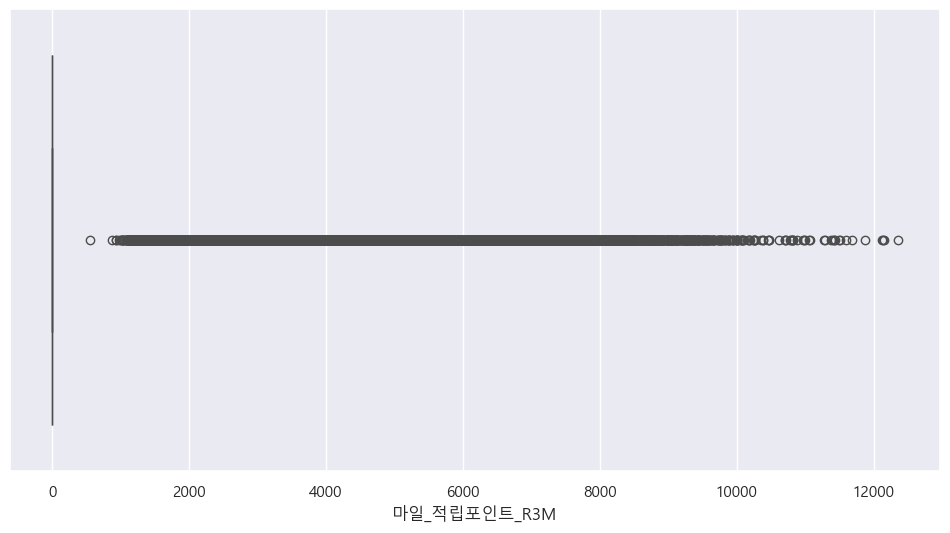

In [89]:
# 이상치 탐색
sns.boxplot(x=all_df['마일_적립포인트_R3M'])

### 마일_이용포인트_R12M
- 이용 마일리지 (최근1년간)

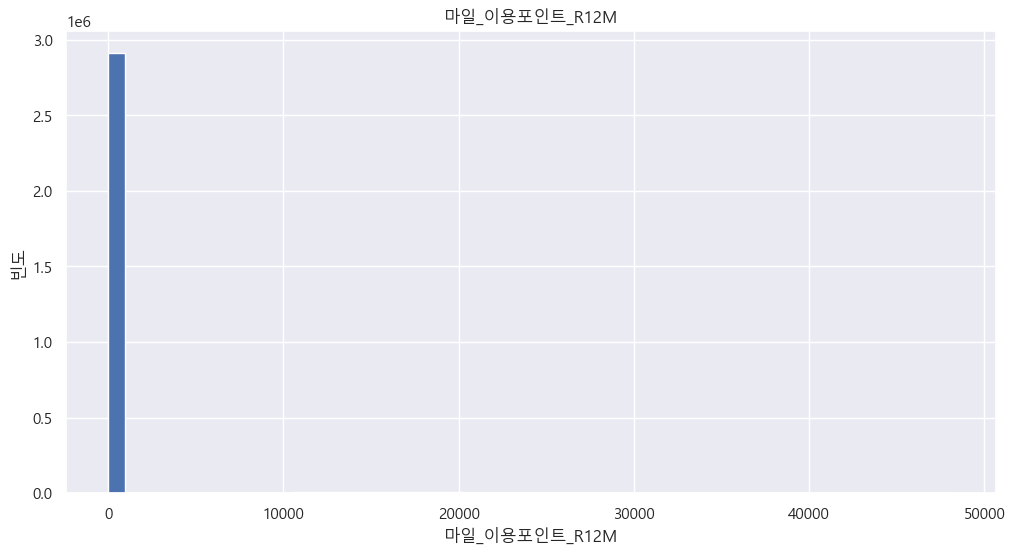

In [73]:
all_df['마일_이용포인트_R12M'].hist(bins=50)
plt.xlabel('마일_이용포인트_R12M')
plt.ylabel('빈도')
plt.title('마일_이용포인트_R12M')
plt.show()

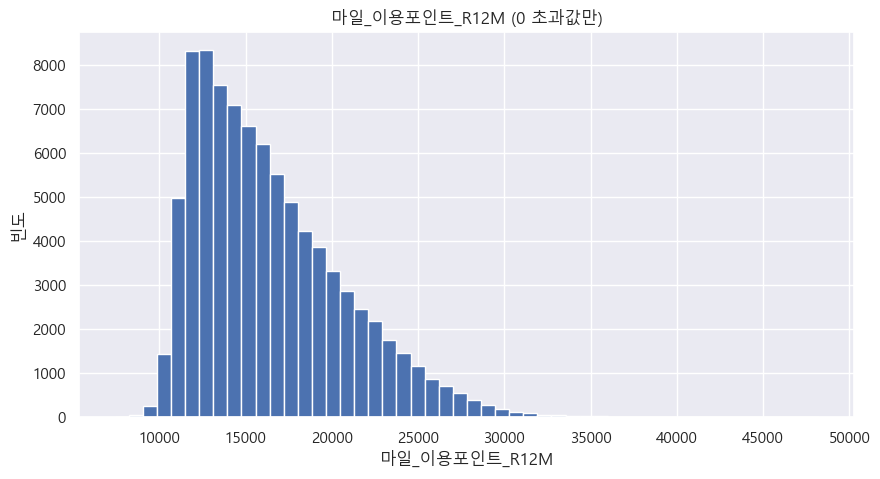

In [212]:
used = all_df[all_df['마일_이용포인트_R12M'] > 0]

plt.figure(figsize=(10, 5))
plt.hist(
    used['마일_이용포인트_R12M'],
    bins=50,
)
plt.title('마일_이용포인트_R12M (0 초과값만)')
plt.xlabel('마일_이용포인트_R12M')
plt.ylabel('빈도')
plt.show()

In [74]:
desc = all_df['마일_이용포인트_R12M'].describe()
print(desc.apply(lambda x: format(x, '.2f')))

count    3000000.00
mean         479.93
std         2858.73
min            0.00
25%            0.00
50%            0.00
75%            0.00
max        48250.00
Name: 마일_이용포인트_R12M, dtype: object


<Axes: xlabel='마일_이용포인트_R12M'>

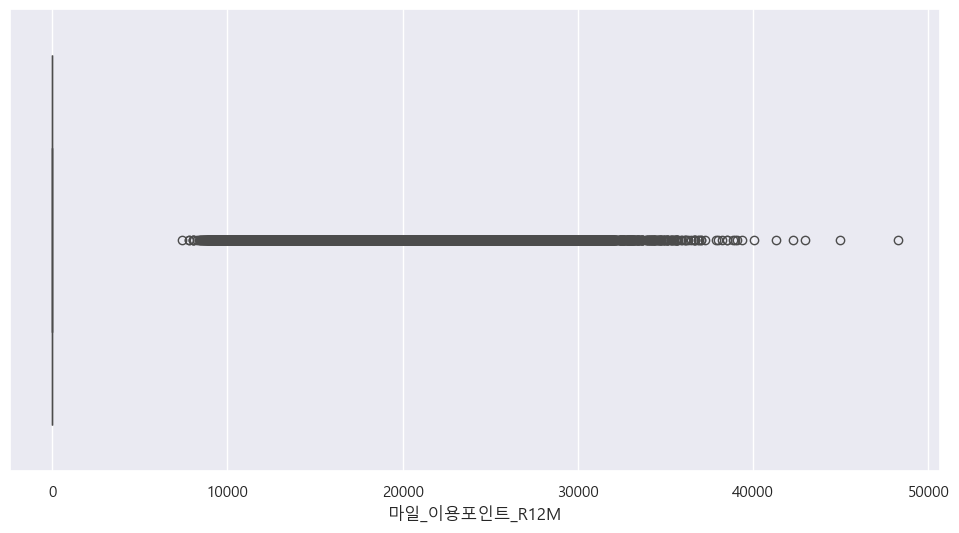

In [91]:
# 이상치 탐색
sns.boxplot(x=all_df['마일_이용포인트_R12M'])

### 마일_이용포인트_R3M
- 이용 마일리지 (최근3개월간)

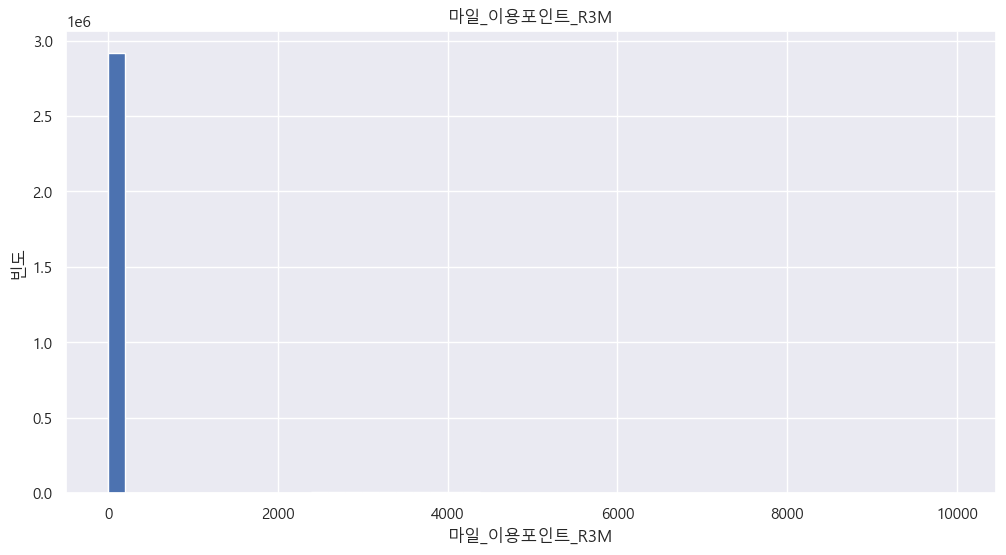

In [92]:
all_df['마일_이용포인트_R3M'].hist(bins=50)
plt.xlabel('마일_이용포인트_R3M')
plt.ylabel('빈도')
plt.title('마일_이용포인트_R3M')
plt.show()

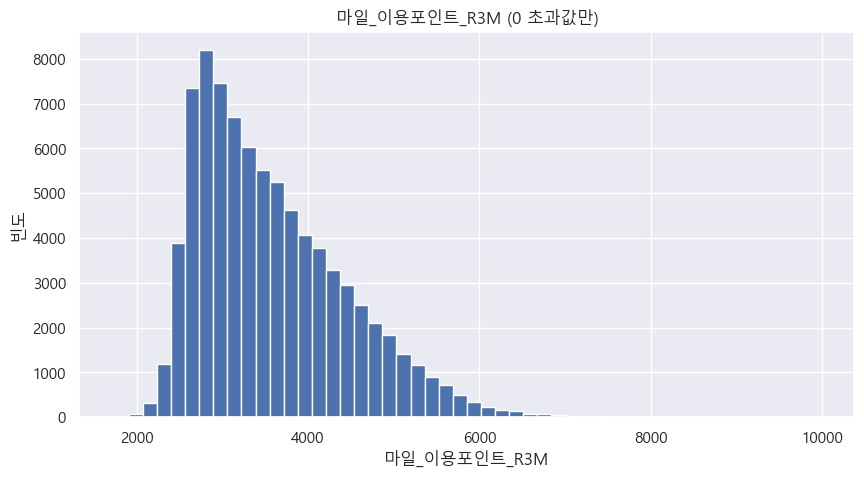

In [213]:
used = all_df[all_df['마일_이용포인트_R3M'] > 0]

plt.figure(figsize=(10, 5))
plt.hist(
    used['마일_이용포인트_R3M'],
    bins=50,
)
plt.title('마일_이용포인트_R3M (0 초과값만)')
plt.xlabel('마일_이용포인트_R3M')
plt.ylabel('빈도')
plt.show()

In [93]:
desc = all_df['마일_이용포인트_R3M'].describe()
print(desc.apply(lambda x: format(x, '.2f')))

count    3000000.00
mean          98.79
std          603.45
min            0.00
25%            0.00
50%            0.00
75%            0.00
max         9962.00
Name: 마일_이용포인트_R3M, dtype: object


<Axes: xlabel='마일_이용포인트_R3M'>

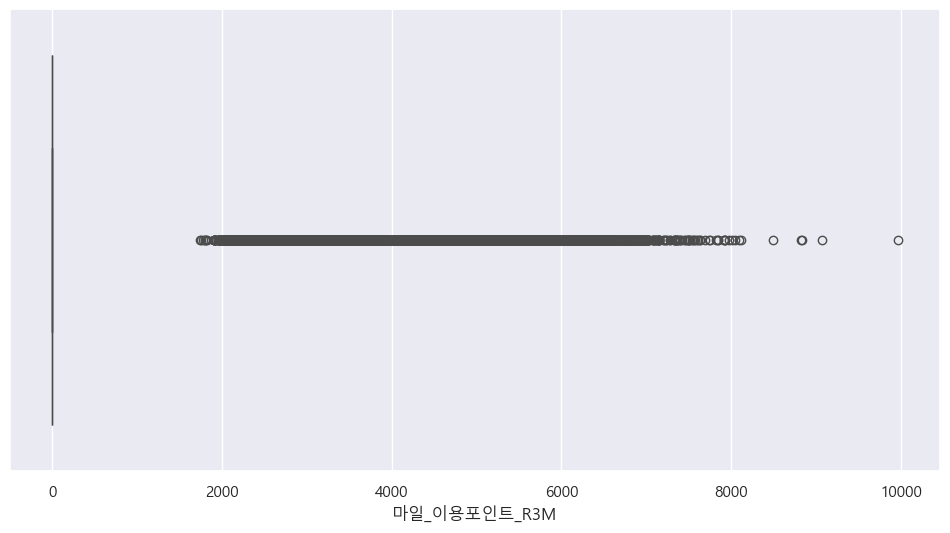

In [94]:
# 이상치 탐색
sns.boxplot(x=all_df['마일_이용포인트_R3M'])

### 마일_잔여포인트_B0M
- 잔여 마일리지 (당월)

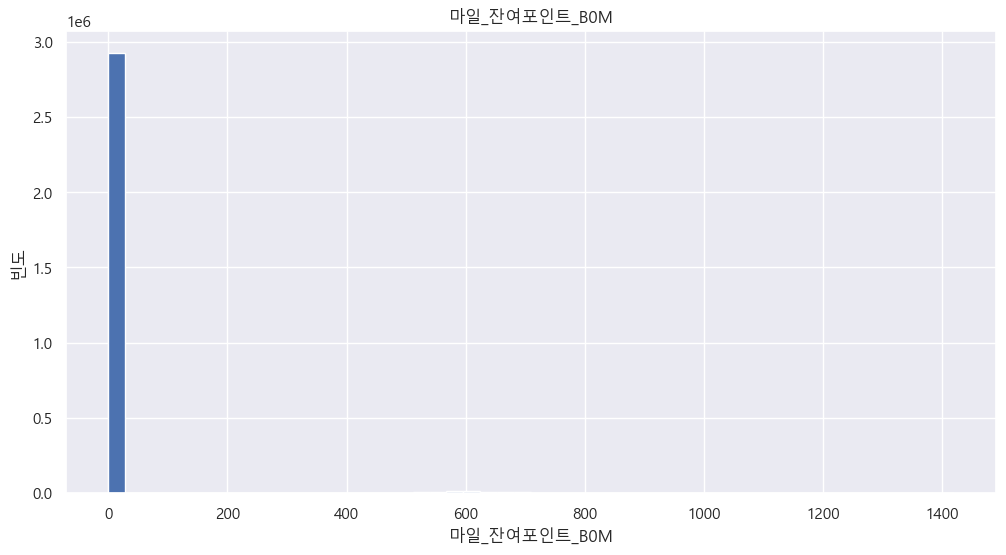

In [95]:
all_df['마일_잔여포인트_B0M'].hist(bins=50)
plt.xlabel('마일_잔여포인트_B0M')
plt.ylabel('빈도')
plt.title('마일_잔여포인트_B0M')
plt.show()

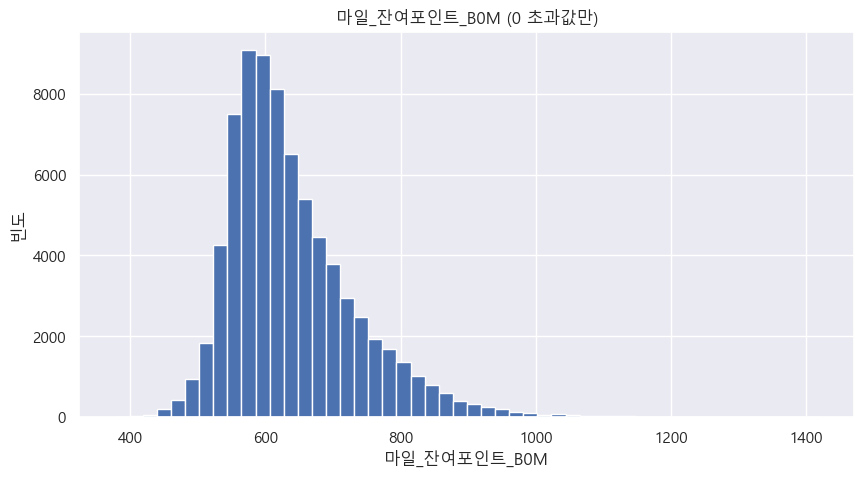

In [214]:
used = all_df[all_df['마일_잔여포인트_B0M'] > 0]

plt.figure(figsize=(10, 5))
plt.hist(
    used['마일_잔여포인트_B0M'],
    bins=50,
)
plt.title('마일_잔여포인트_B0M (0 초과값만)')
plt.xlabel('마일_잔여포인트_B0M')
plt.ylabel('빈도')
plt.show()

In [96]:
desc = all_df['마일_잔여포인트_B0M'].describe()
print(desc.apply(lambda x: format(x, '.2f')))

count    3000000.00
mean          16.20
std          101.54
min            0.00
25%            0.00
50%            0.00
75%            0.00
max         1419.00
Name: 마일_잔여포인트_B0M, dtype: object


<Axes: xlabel='마일_이용포인트_R3M'>

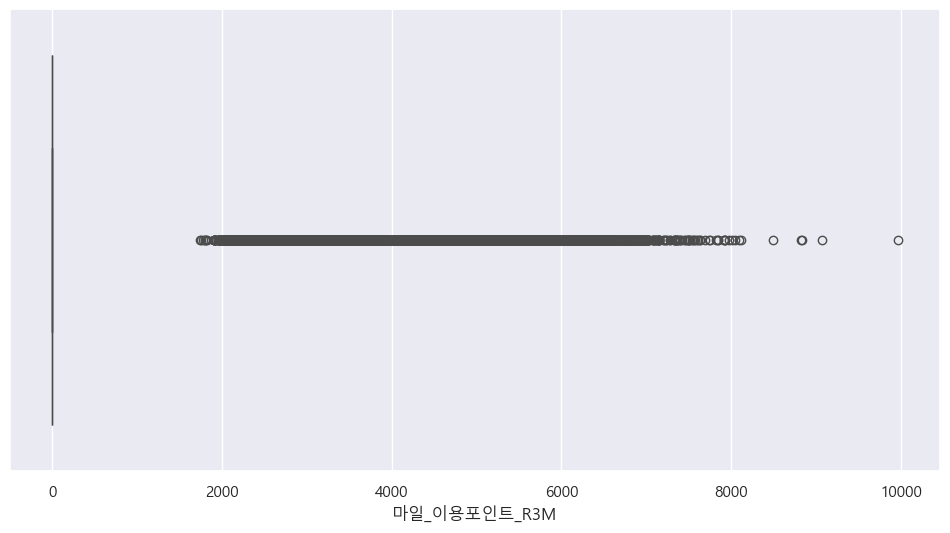

In [97]:
# 이상치 탐색
sns.boxplot(x=all_df['마일_이용포인트_R3M'])

### 할인건수_R3M
- 할인 혜택 건수 (최근3개월간)

In [98]:
all_df['할인건수_R3M'].value_counts()

할인건수_R3M
1회 이상     2678723
10회 이상     244875
20회 이상      66253
30회 이상      10139
40회 이상         10
Name: count, dtype: int64

40회 이상이 매우 적게 나타난다.

### 할인금액_R3M
- 할인 혜택 금액 (최근3개월간)

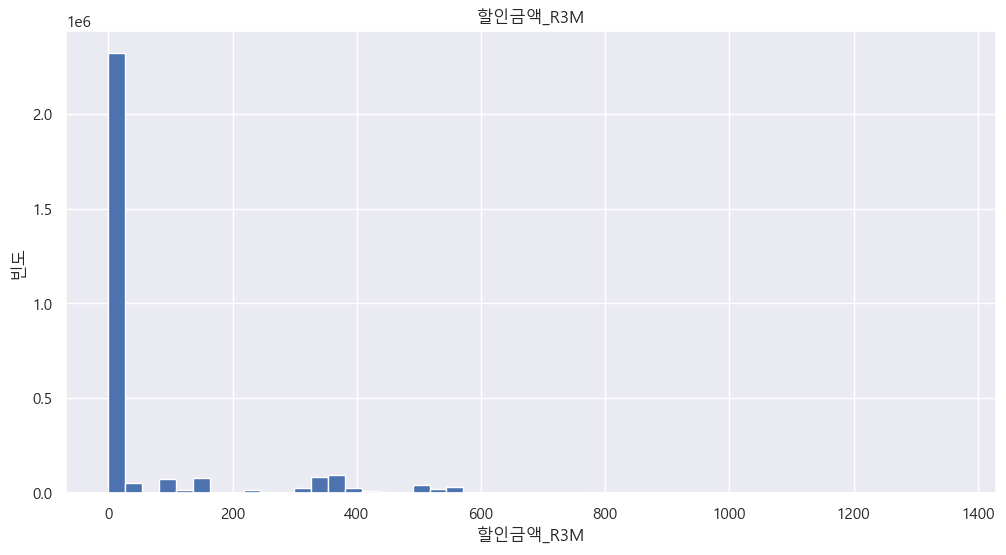

In [102]:
all_df['할인금액_R3M'].hist(bins=50)
plt.xlabel('할인금액_R3M')
plt.ylabel('빈도')
plt.title('할인금액_R3M')
plt.show()

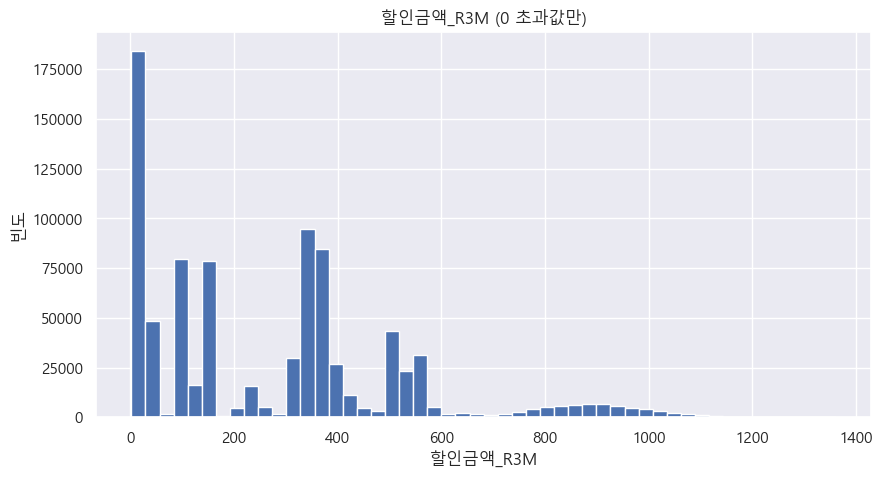

In [215]:
used = all_df[all_df['할인금액_R3M'] > 0]

plt.figure(figsize=(10, 5))
plt.hist(
    used['할인금액_R3M'],
    bins=50,
)
plt.title('할인금액_R3M (0 초과값만)')
plt.xlabel('할인금액_R3M')
plt.ylabel('빈도')
plt.show()

In [103]:
desc = all_df['할인금액_R3M'].describe()
print(desc.apply(lambda x: format(x, '.2f')))

count    3000000.00
mean          80.56
std          184.73
min            0.00
25%            0.00
50%            0.00
75%           26.00
max         1361.00
Name: 할인금액_R3M, dtype: object


<Axes: xlabel='할인금액_R3M'>

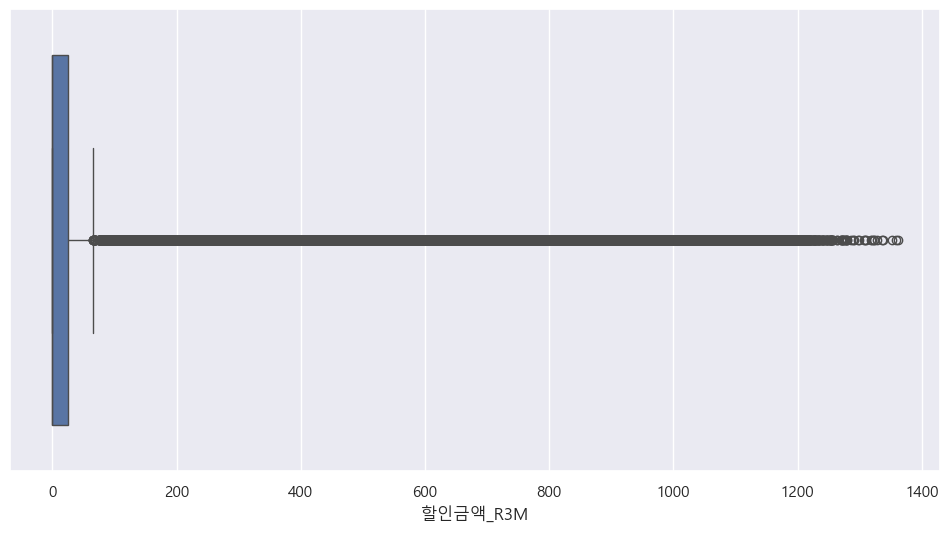

In [104]:
# 이상치 탐색
sns.boxplot(x=all_df['할인금액_R3M'])

### 할인건수_B0M
- 할인 혜택 건수 (당월)

In [106]:
all_df['할인건수_B0M'].value_counts()

할인건수_B0M
1회 이상     2985956
10회 이상      14044
Name: count, dtype: int64

In [107]:
df1['할인건수_B0M'].value_counts()

할인건수_B0M
1회 이상     398296
10회 이상      1704
Name: count, dtype: int64

In [108]:
df7['할인건수_B0M'].value_counts()

할인건수_B0M
1회 이상     99583
10회 이상      417
Name: count, dtype: int64

### 할인금액_B0M
- 할인 혜택 금액 (당월)

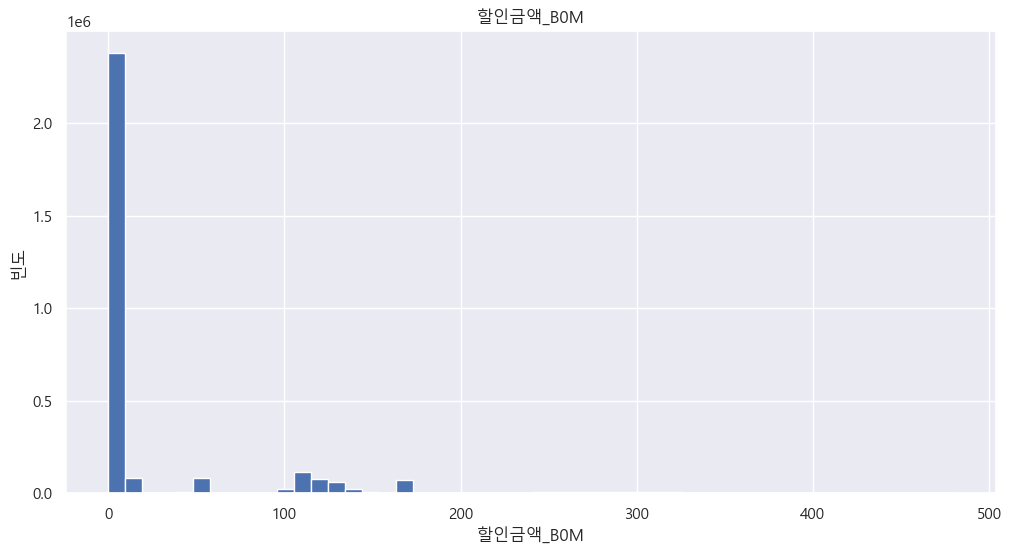

In [109]:
all_df['할인금액_B0M'].hist(bins=50)
plt.xlabel('할인금액_B0M')
plt.ylabel('빈도')
plt.title('할인금액_B0M')
plt.show()

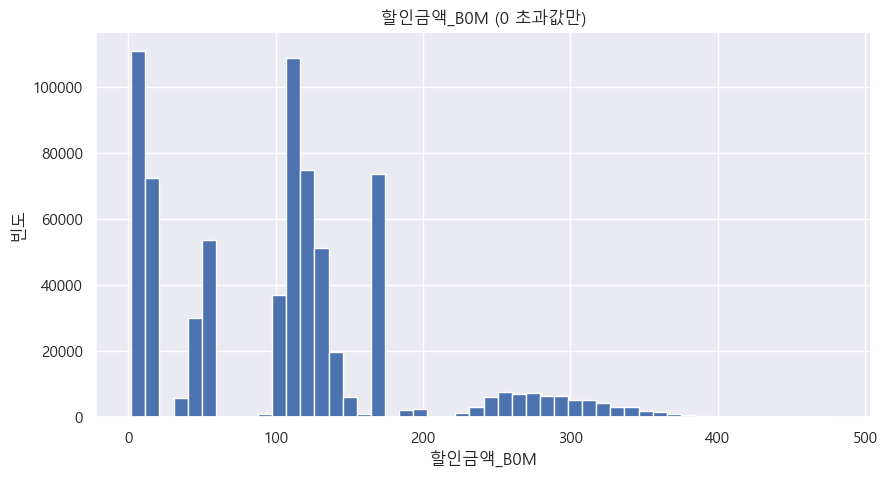

In [216]:
used = all_df[all_df['할인금액_B0M'] > 0]

plt.figure(figsize=(10, 5))
plt.hist(
    used['할인금액_B0M'],
    bins=50,
)
plt.title('할인금액_B0M (0 초과값만)')
plt.xlabel('할인금액_B0M')
plt.ylabel('빈도')
plt.show()

In [110]:
desc = all_df['할인금액_B0M'].describe()
print(desc.apply(lambda x: format(x, '.2f')))

count    3000000.00
mean          25.61
std           61.04
min            0.00
25%            0.00
50%            0.00
75%            0.00
max          480.00
Name: 할인금액_B0M, dtype: object


<Axes: xlabel='할인금액_B0M'>

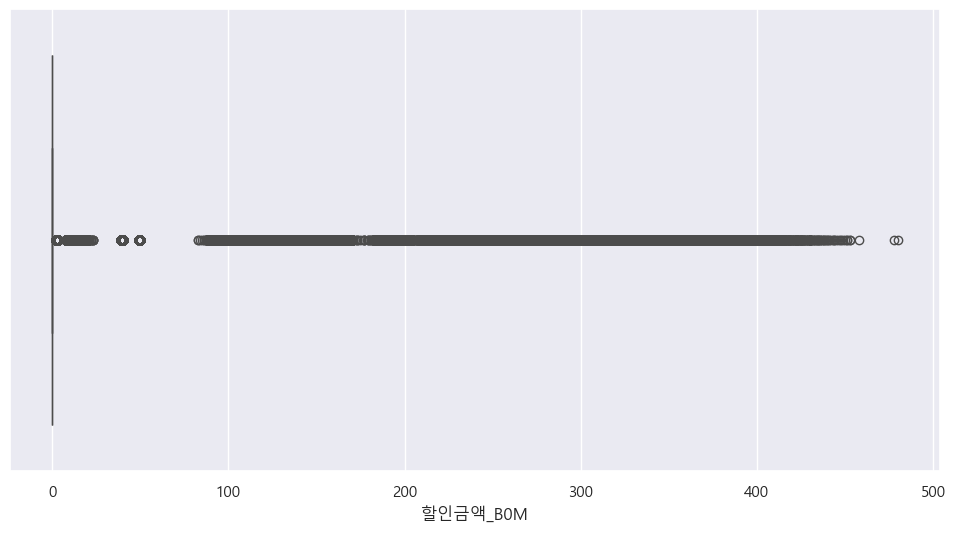

In [111]:
# 이상치 탐색
sns.boxplot(x=all_df['할인금액_B0M'])

### 할인금액_청구서_R3M
- 할인 혜택 금액 청구서 기준 (최근3개월간)

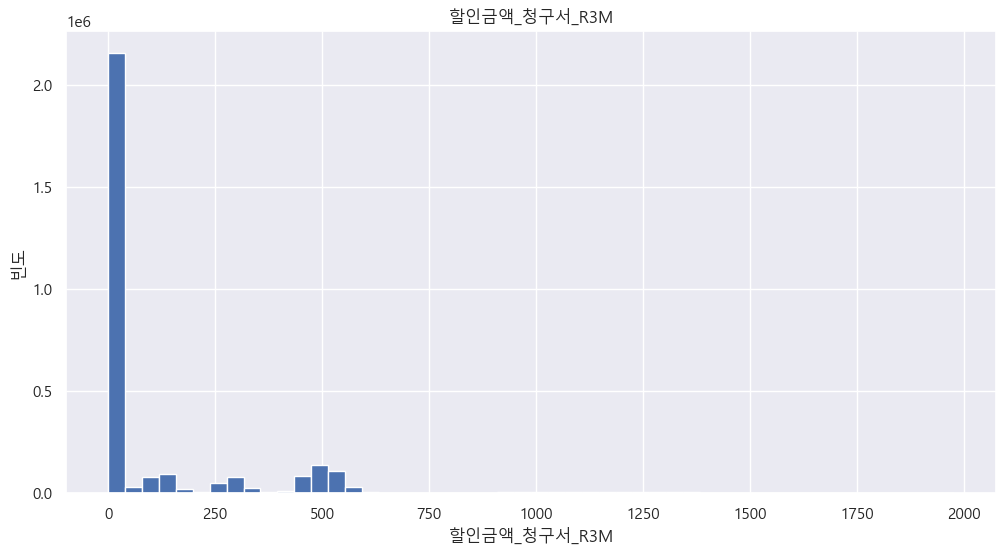

In [112]:
all_df['할인금액_청구서_R3M'].hist(bins=50)
plt.xlabel('할인금액_청구서_R3M')
plt.ylabel('빈도')
plt.title('할인금액_청구서_R3M')
plt.show()

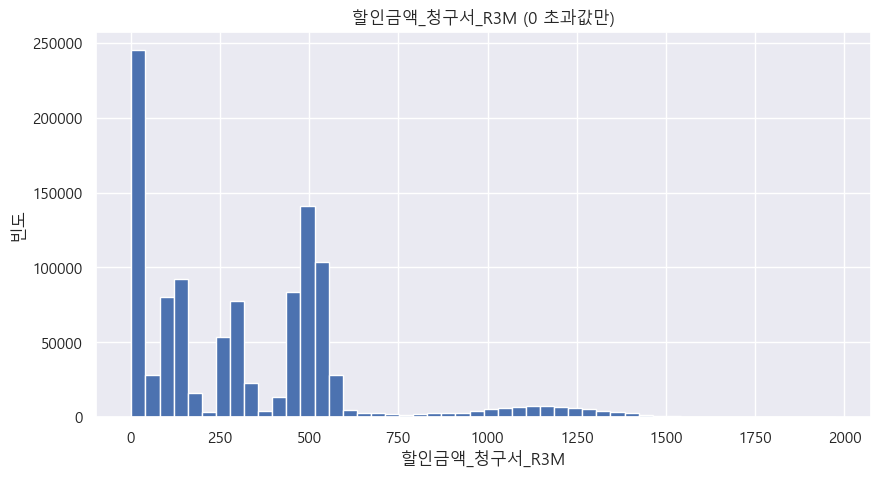

In [217]:
used = all_df[all_df['할인금액_청구서_R3M'] > 0]

plt.figure(figsize=(10, 5))
plt.hist(
    used['할인금액_청구서_R3M'],
    bins=50,
)
plt.title('할인금액_청구서_R3M (0 초과값만)')
plt.xlabel('할인금액_청구서_R3M')
plt.ylabel('빈도')
plt.show()

In [114]:
desc = all_df['할인금액_청구서_R3M'].describe()
print(desc.apply(lambda x: format(x, '.2f')))

count    3000000.00
mean         120.71
std          244.12
min            0.00
25%            0.00
50%            0.00
75%          102.00
max         1976.00
Name: 할인금액_청구서_R3M, dtype: object


<Axes: xlabel='할인금액_청구서_R3M'>

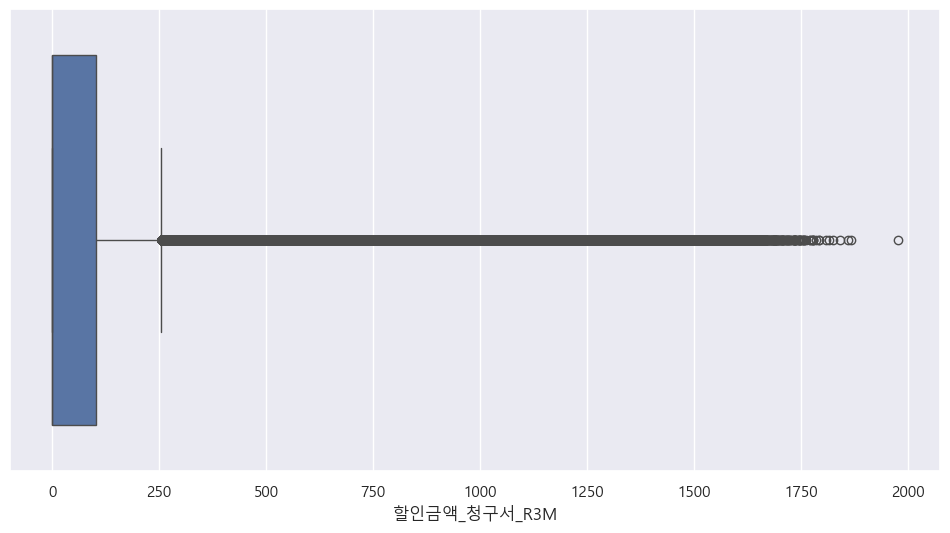

In [115]:
# 이상치 탐색
sns.boxplot(x=all_df['할인금액_청구서_R3M'])

### 할인금액_청구서_B0M
- 할인 혜택 금액 청구서 기준 (당월)

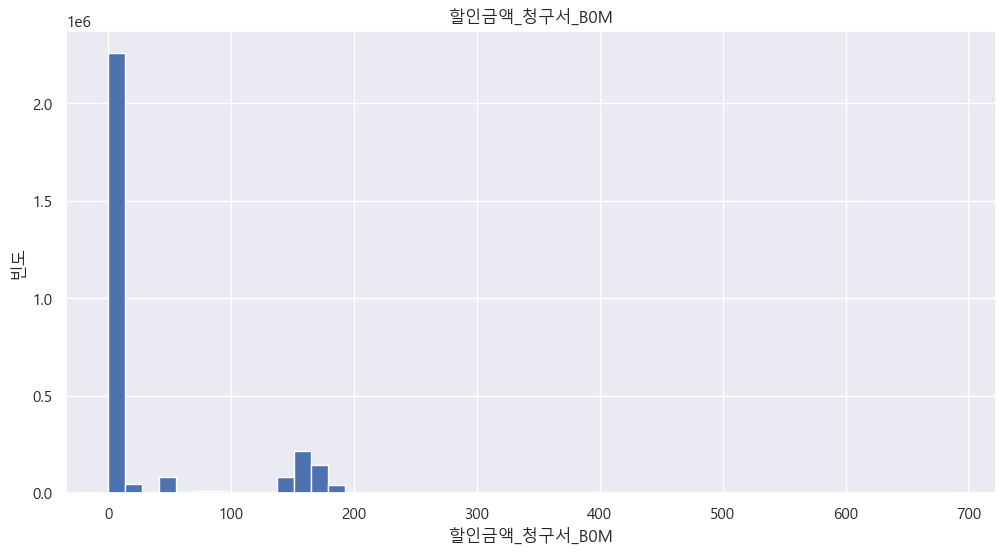

In [116]:
all_df['할인금액_청구서_B0M'].hist(bins=50)
plt.xlabel('할인금액_청구서_B0M')
plt.ylabel('빈도')
plt.title('할인금액_청구서_B0M')
plt.show()

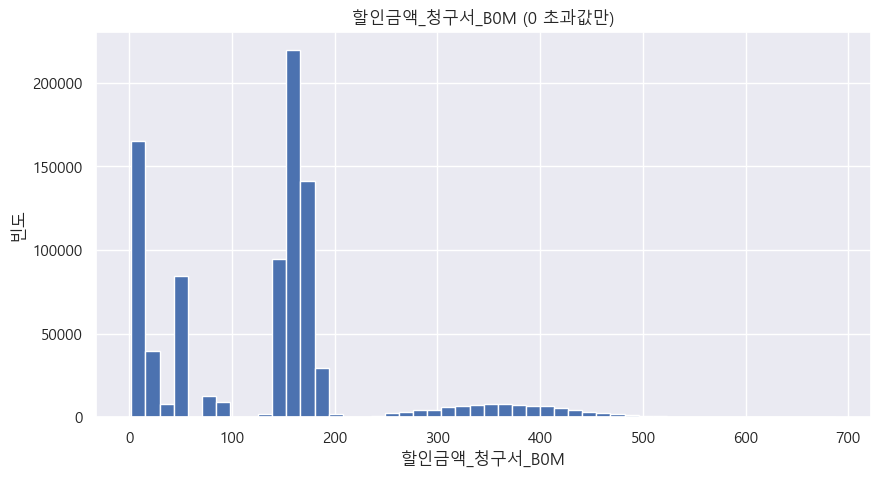

In [218]:
used = all_df[all_df['할인금액_청구서_B0M'] > 0]

plt.figure(figsize=(10, 5))
plt.hist(
    used['할인금액_청구서_B0M'],
    bins=50,
)
plt.title('할인금액_청구서_B0M (0 초과값만)')
plt.xlabel('할인금액_청구서_B0M')
plt.ylabel('빈도')
plt.show()

In [117]:
desc = all_df['할인금액_청구서_B0M'].describe()
print(desc.apply(lambda x: format(x, '.2f')))

count    3000000.00
mean          40.52
std           83.81
min            0.00
25%            0.00
50%            0.00
75%           12.00
max          688.00
Name: 할인금액_청구서_B0M, dtype: object


<Axes: xlabel='할인금액_청구서_B0M'>

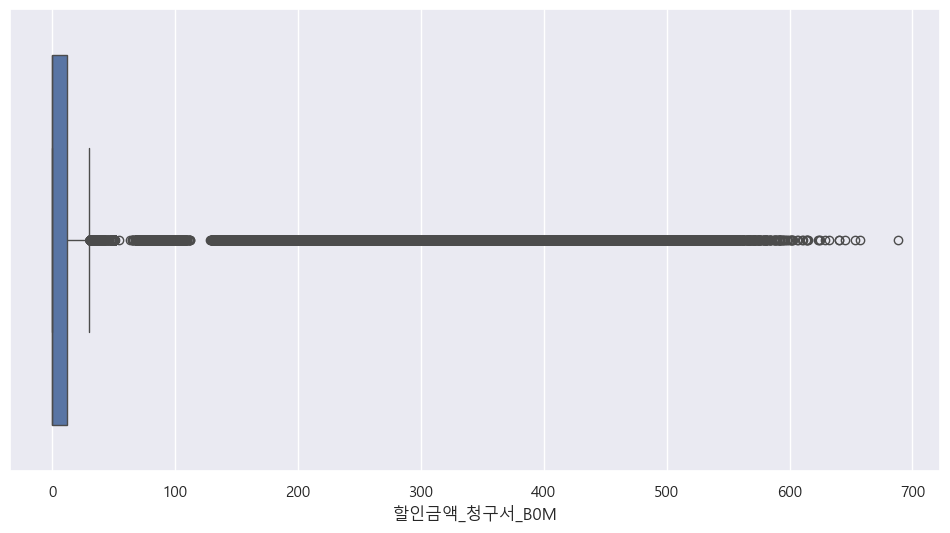

In [118]:
# 이상치 탐색
sns.boxplot(x=all_df['할인금액_청구서_B0M'])

### 상환개월수_결제일_R6M
- 이용금액 결제일에 납부한 개월수 (최근6개월간)

In [137]:
all_df['상환개월수_결제일_R6M'].value_counts().sort_index()

상환개월수_결제일_R6M
0     527658
1     250690
2     164151
3     100558
4     247480
5     281360
6    1428103
Name: count, dtype: int64

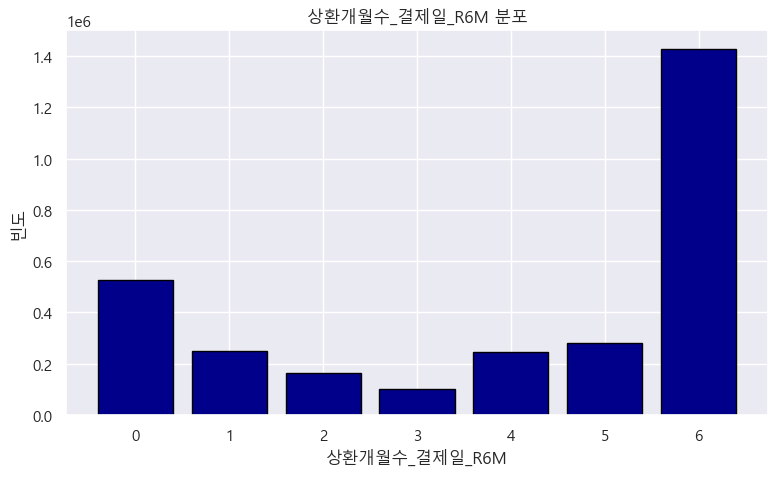

In [128]:
value_counts = all_df['상환개월수_결제일_R6M'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(value_counts.index.astype(str), value_counts.values, color='darkblue', edgecolor='black')
plt.xlabel('상환개월수_결제일_R6M')
plt.ylabel('빈도')
plt.title('상환개월수_결제일_R6M 분포')
plt.tight_layout()
plt.show()

### 상환개월수_결제일_R3M
- 이용금액 결제일에 납부한 개월수 (최근6개월간)

In [136]:
all_df['상환개월수_결제일_R3M'].value_counts().sort_index()

상환개월수_결제일_R3M
0     715066
1     278503
2     252279
3    1754152
Name: count, dtype: int64

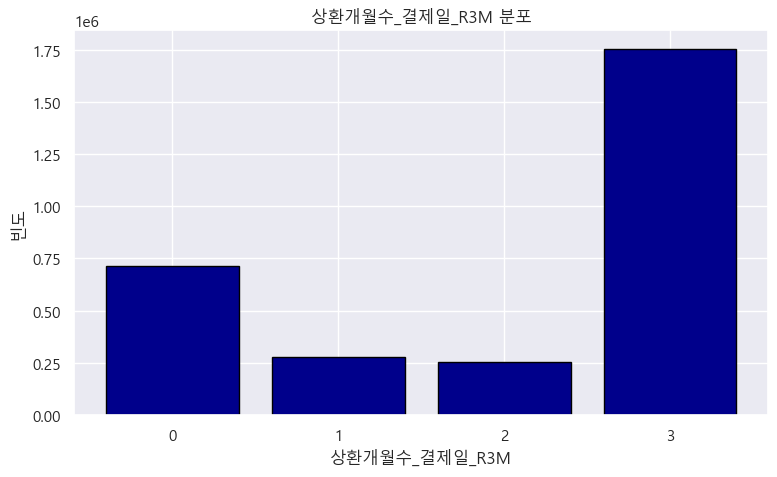

In [129]:
value_counts = all_df['상환개월수_결제일_R3M'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(value_counts.index.astype(str), value_counts.values, color='darkblue', edgecolor='black')
plt.xlabel('상환개월수_결제일_R3M')
plt.ylabel('빈도')
plt.title('상환개월수_결제일_R3M 분포')
plt.tight_layout()
plt.show()

### 선결제건수_R6M
- 선결제건수 (최근6개월간)

In [135]:
all_df['선결제건수_R6M'].value_counts().sort_index()

선결제건수_R6M
0    2705100
1      20166
2     110932
3      63494
4      30893
5      25043
6      28565
7      14582
8       1225
Name: count, dtype: int64

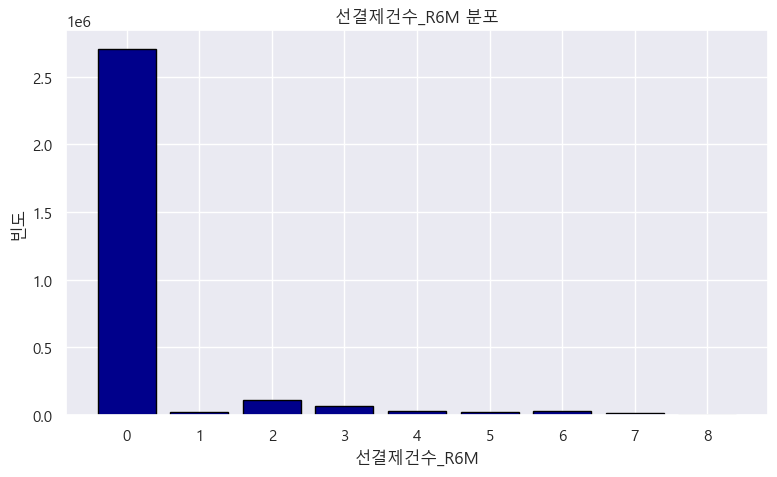

In [131]:
value_counts = all_df['선결제건수_R6M'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(value_counts.index.astype(str), value_counts.values, color='darkblue', edgecolor='black')
plt.xlabel('선결제건수_R6M')
plt.ylabel('빈도')
plt.title('선결제건수_R6M 분포')
plt.tight_layout()
plt.show()

### 선결제건수_R3M
- 선결제건수 (최근 3개월간)

In [133]:
all_df['선결제건수_R3M'].value_counts().sort_index()

선결제건수_R3M
0    2777963
1      22441
2     133131
3      56093
4      10372
Name: count, dtype: int64

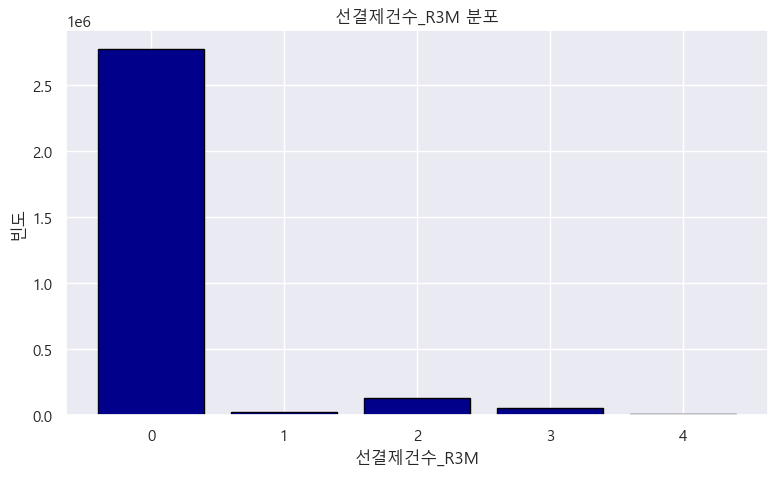

In [134]:
value_counts = all_df['선결제건수_R3M'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(value_counts.index.astype(str), value_counts.values, color='darkblue', edgecolor='black')
plt.xlabel('선결제건수_R3M')
plt.ylabel('빈도')
plt.title('선결제건수_R3M 분포')
plt.tight_layout()
plt.show()

### 연체건수_R6M
- 연체건수 (최근6개월간)

In [138]:
all_df['연체건수_R6M'].value_counts().sort_index()

연체건수_R6M
0    2523510
1     105313
2     154418
3      82310
4      53608
5      41661
6      33637
7       5537
8          6
Name: count, dtype: int64

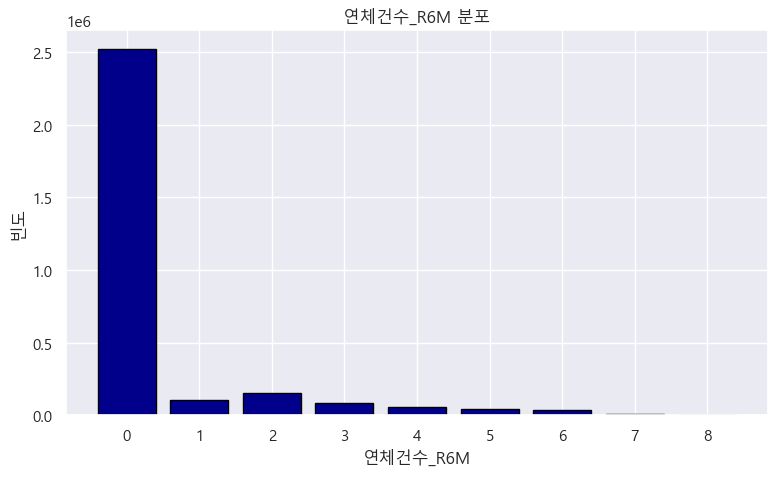

In [139]:
value_counts = all_df['연체건수_R6M'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(value_counts.index.astype(str), value_counts.values, color='darkblue', edgecolor='black')
plt.xlabel('연체건수_R6M')
plt.ylabel('빈도')
plt.title('연체건수_R6M 분포')
plt.tight_layout()
plt.show()

### 연체건수_R3M
- 연체건수 (최근3개월간)

In [140]:
all_df['연체건수_R3M'].value_counts().sort_index()

연체건수_R3M
0    2678526
1      71188
2     167273
3      75349
4       7664
Name: count, dtype: int64

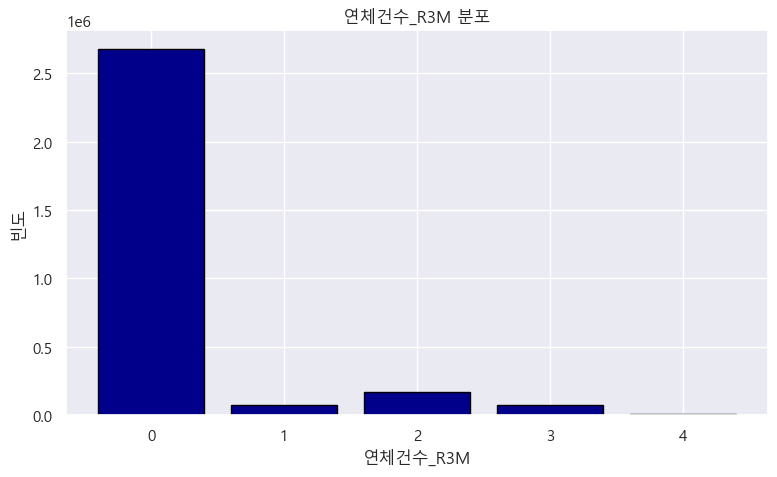

In [141]:
value_counts = all_df['연체건수_R3M'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(value_counts.index.astype(str), value_counts.values, color='darkblue', edgecolor='black')
plt.xlabel('연체건수_R3M')
plt.ylabel('빈도')
plt.title('연체건수_R3M 분포')
plt.tight_layout()
plt.show()

### 혜택수혜금액_R3M
- 혜택 받은 금액 (최근3개월)
- (마일리지(1=15원) + 카드 상품 포인트 적립 + 이벤트 및 기타 매출 포인트 적립 + 할인금액)

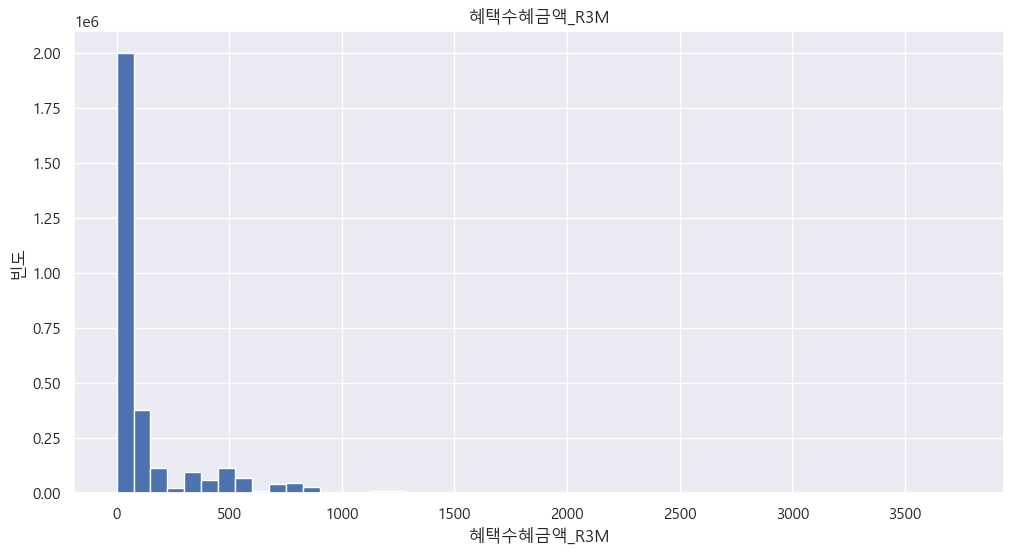

In [142]:
all_df['혜택수혜금액_R3M'].hist(bins=50)
plt.xlabel('혜택수혜금액_R3M')
plt.ylabel('빈도')
plt.title('혜택수혜금액_R3M')
plt.show()

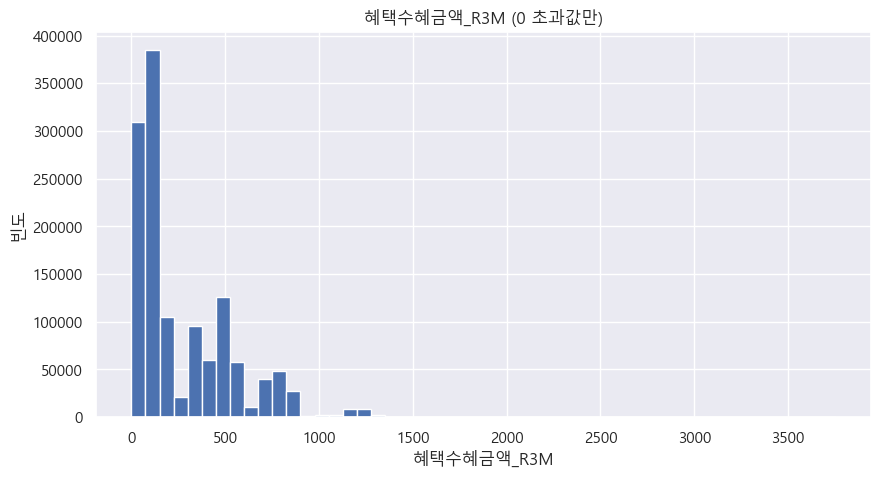

In [219]:
used = all_df[all_df['혜택수혜금액_R3M'] > 0]

plt.figure(figsize=(10, 5))
plt.hist(
    used['혜택수혜금액_R3M'],
    bins=50,
)
plt.title('혜택수혜금액_R3M (0 초과값만)')
plt.xlabel('혜택수혜금액_R3M')
plt.ylabel('빈도')
plt.show()

In [143]:
desc = all_df['혜택수혜금액_R3M'].describe()
print(desc.apply(lambda x: format(x, '.2f')))

count    3000000.00
mean         119.62
std          224.13
min            0.00
25%            0.00
50%            0.00
75%          143.00
max         3754.00
Name: 혜택수혜금액_R3M, dtype: object


<Axes: xlabel='혜택수혜금액_R3M'>

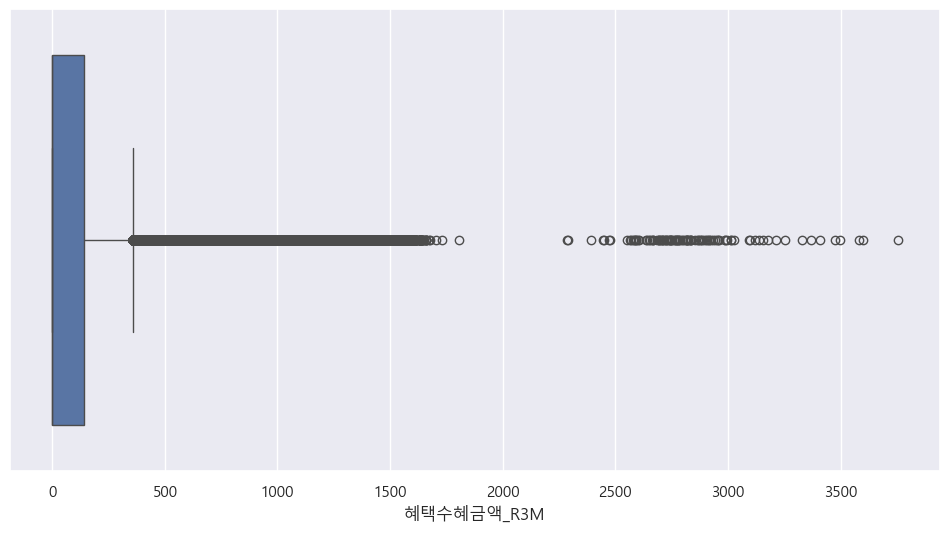

In [144]:
# 이상치 탐색
sns.boxplot(x=all_df['혜택수혜금액_R3M'])

### 포인트_마일리지_환산_B0M
- 마일리지 당 15원으로 환산한 금액 (당월)

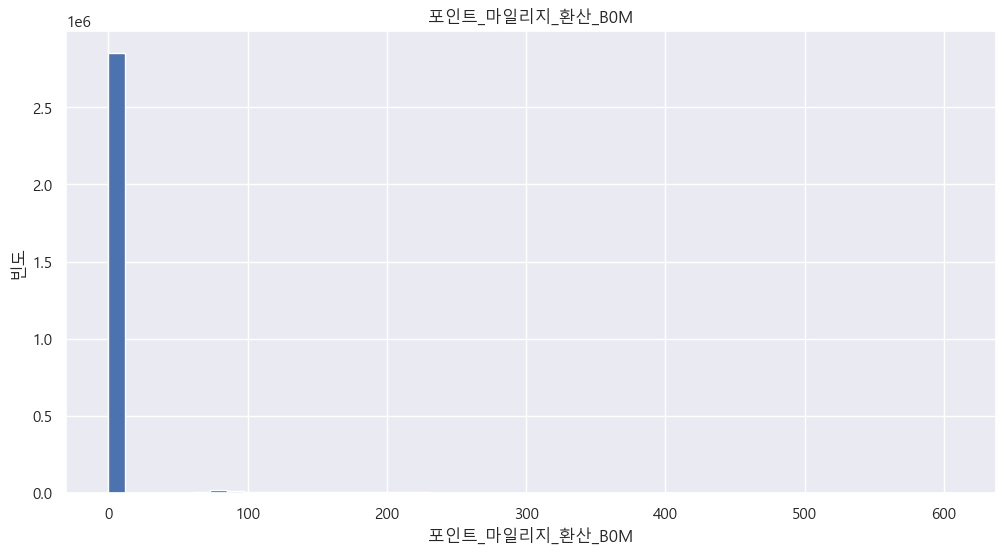

In [145]:
all_df['포인트_마일리지_환산_B0M'].hist(bins=50)
plt.xlabel('포인트_마일리지_환산_B0M')
plt.ylabel('빈도')
plt.title('포인트_마일리지_환산_B0M')
plt.show()

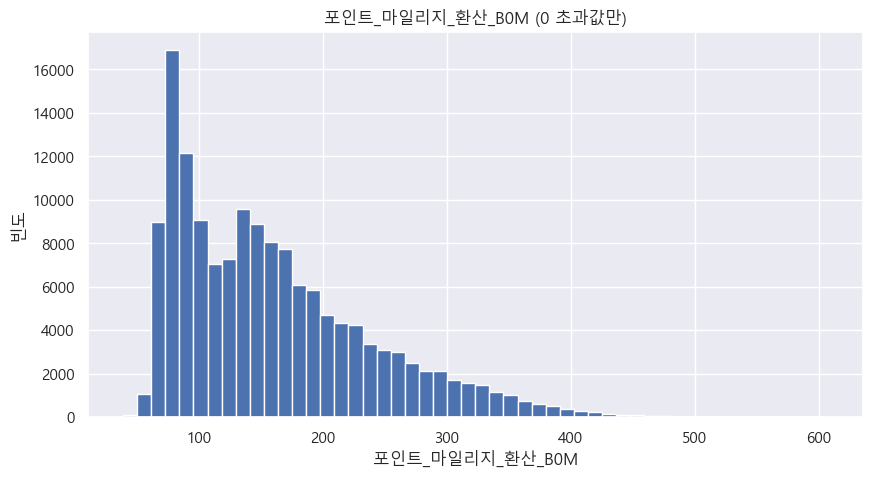

In [220]:
used = all_df[all_df['포인트_마일리지_환산_B0M'] > 0]

plt.figure(figsize=(10, 5))
plt.hist(
    used['포인트_마일리지_환산_B0M'],
    bins=50,
)
plt.title('포인트_마일리지_환산_B0M (0 초과값만)')
plt.xlabel('포인트_마일리지_환산_B0M')
plt.ylabel('빈도')
plt.show()

In [146]:
desc = all_df['포인트_마일리지_환산_B0M'].describe()
print(desc.apply(lambda x: format(x, '.2f')))

count    3000000.00
mean           7.93
std           38.92
min            0.00
25%            0.00
50%            0.00
75%            0.00
max          607.00
Name: 포인트_마일리지_환산_B0M, dtype: object


<Axes: xlabel='포인트_마일리지_환산_B0M'>

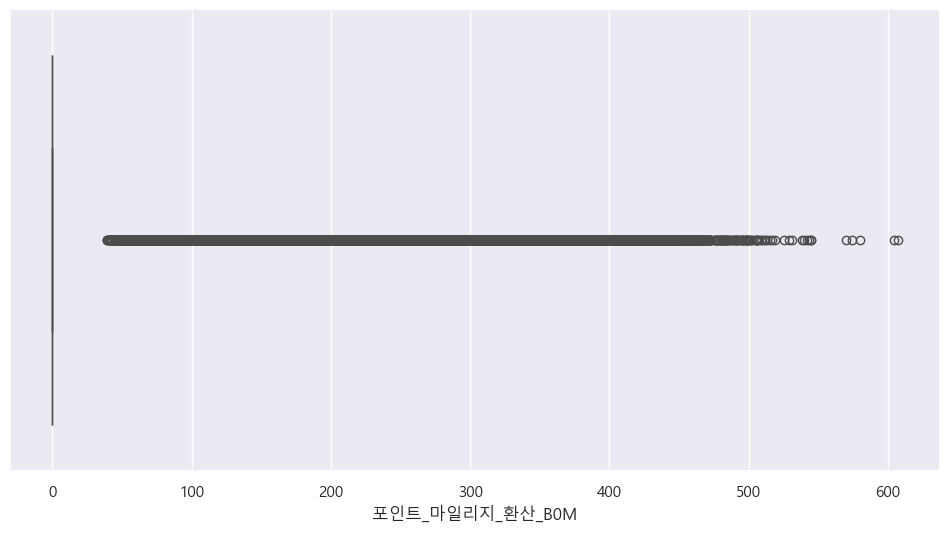

In [147]:
# 이상치 탐색
sns.boxplot(x=all_df['포인트_마일리지_환산_B0M'])

### 혜택수혜금액
- 이번 달 혜택 받은 금액 (당월)
- (마일리지(1=15원) + 카드 상품 포인트 적립 + 이벤트 및 기타 매출 포인트 적립 + 할인금액)

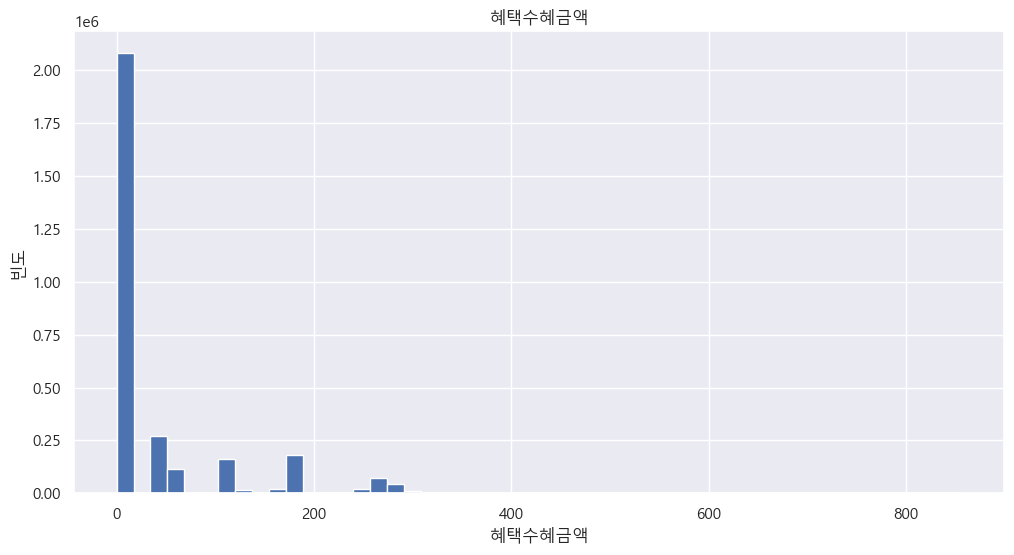

In [154]:
all_df['혜택수혜금액'].hist(bins=50)
plt.xlabel('혜택수혜금액')
plt.ylabel('빈도')
plt.title('혜택수혜금액')
plt.show()

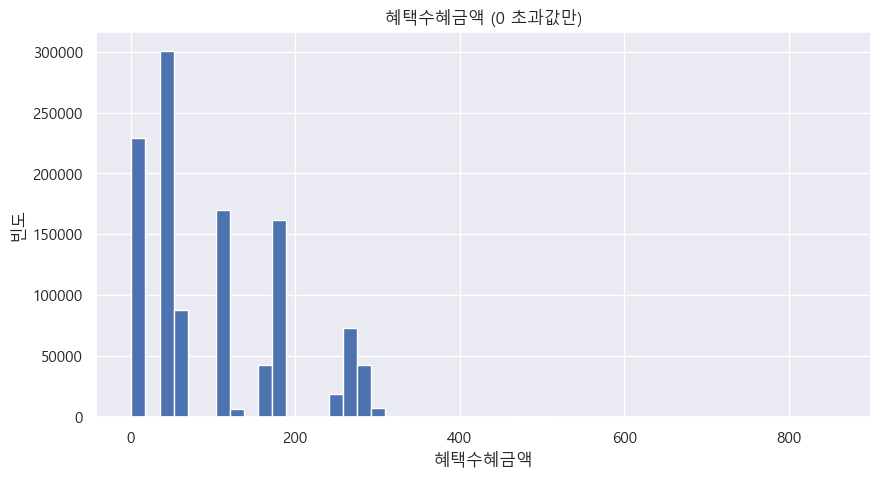

In [221]:
used = all_df[all_df['혜택수혜금액'] > 0]

plt.figure(figsize=(10, 5))
plt.hist(
    used['혜택수혜금액'],
    bins=50,
)
plt.title('혜택수혜금액 (0 초과값만)')
plt.xlabel('혜택수혜금액')
plt.ylabel('빈도')
plt.show()

In [155]:
desc = all_df['혜택수혜금액'].describe()
print(desc.apply(lambda x: format(x, '.2f')))

count    3000000.00
mean          39.45
std           74.56
min            0.00
25%            0.00
50%            0.00
75%           50.00
max          857.00
Name: 혜택수혜금액, dtype: object


<Axes: xlabel='혜택수혜금액'>

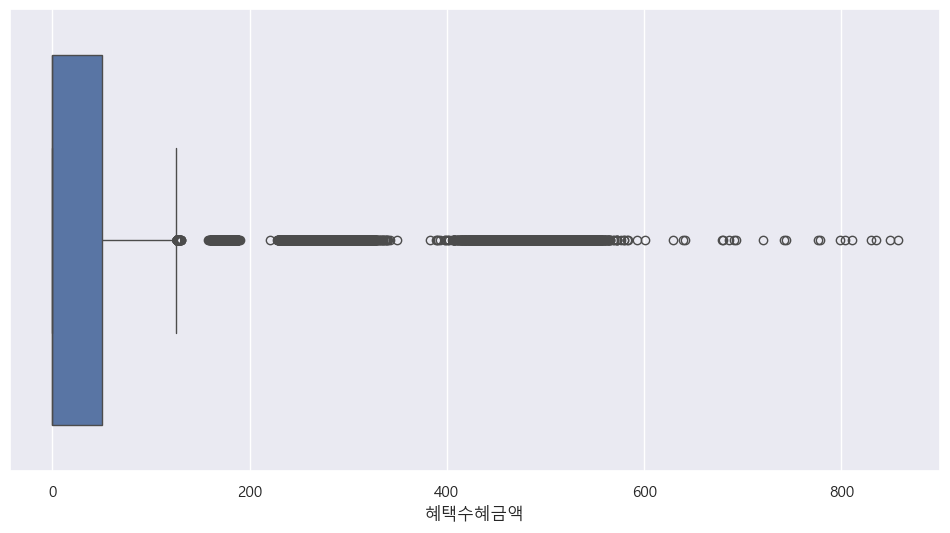

In [156]:
# 이상치 탐색
sns.boxplot(x=all_df['혜택수혜금액'])